In [1]:
#from sympy import Dummy, lambdify
from numpy import array, hstack, zeros, linspace, pi, ones
from numpy.linalg import solve
from scipy.integrate import odeint
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Shit to try

- Plot many trajectories on the same graph, with varying parameters, to show the change in behaviour

- Plot M_max and M_min on a graph, as function of \beta^2/\kappa \mu_M and color wrt behaviour


In [2]:
#Vegetação periodica em função do tempo:
#Caso queiramos utilizar a vegetação começando não periodica, esta deve ser incluida na eq diferencial

    
    
def Veg(t):
    return 1 - (gamma * np.exp(-r* (t % tau)))/(1 - (1 - gamma)*np.exp(-r*tau))

In [3]:
#Carrying capacities em função da vegetação:

# Mudar de forma que K_i(0) \neq 0, i \in {f,c}

def K_w(v):
    #K_w is sigmoid
    #Defining Parameters 
    L = K_w_max # Maximum carrying capacity
    k = 5 #Steepness
    x_0 = 0.5 #Sigmoid midpoint
    
    return L/(1 + np.exp(-k*(v - x_0)))
    
    
def K_p(v):
    #K_p is affine
    #Defining Parameters
    K_0 = 0 # Minimum carrying capacity
    L = K_p_max # maximum carrying capacity
    
    return K_0 + (K_p_max - K_0)*v
    
    


In [4]:
# Derivadas com Carrying capacity constante

def right_hand_side_ctt_carrying_capacity(x,t):
    """Returns the derivatives of the states.

    Parameters
    ----------
    x : ndarray, shape(6,1)
        The current state vector.
    t : float
        The current time.
    args : ndarray
        The constants.

    Returns
    -------
    dx : ndarray, shape(6,1)
        The derivative of the state.
    
    """
    S = x[0]
    I = x[1]
    M_S = x[2]
    M_I = x[3]
    L_p = x[4]
    L_w = x[5]     
    
    S_dot = - beta_vh * S * M_I + kappa * I
    I_dot = beta_vh * S * M_I - kappa * I
    M_I_dot = beta_hv * I * M_S - mu_M * M_I
    M_S_dot = kappa * (L_p + L_w) - beta_hv * I * M_S - mu_M * M_S
    L_p_dot = alpha* (K_p_max/(K_p_max + K_w_max)) * (M_I + M_S) * (1 - L_p/K_p_max) - (nu + mu_L)*L_p
    L_w_dot = alpha* (K_w_max/(K_p_max + K_w_max)) * (M_I + M_S) * (1 - L_w/K_w_max) - (nu + mu_L)*L_w
    
    dx = np.array([S_dot,I_dot,M_S_dot,M_I_dot,L_p_dot,L_w_dot])
    
    return dx

In [5]:
# Derivadas com vegetação variando

def right_hand_side(x , t):
    """Returns the derivatives of the states.

    Parameters
    ----------
    x : ndarray, shape(6,1)
        The current state vector.
    t : float
        The current time.
    args : ndarray
        The constants.

    Returns
    -------
    dx : ndarray, shape(6,1)
        The derivative of the state.
    
    """
    S = x[0]
    I = x[1]
    M_S = x[2]
    M_I = x[3]
    L_p = x[4]
    L_w = x[5]     
    
    S_dot = - beta_vh * S * M_I + kappa * I
    I_dot = beta_vh * S * M_I - kappa * I
    M_I_dot = beta_hv * I * M_S - mu_M * M_I
    M_S_dot = kappa * (L_p + L_w) - beta_hv * I * M_S - mu_M * M_S
    L_p_dot = alpha* (K_p(V(t))/(K_p(V(t)) + K_w(V(t)))) * (M_I + M_S) * (1 - L_p/K_p(V(t))) - (nu + mu_L + mu_p*(1 - V(t)))*L_p
    L_w_dot = alpha* (K_w(V(t))/(K_p(V(t)) + K_w(V(t)))) * (M_I + M_S) * (1 - L_w/K_w(V(t))) - (nu + mu_L)*L_w
    
    dx = np.array([S_dot,I_dot,M_S_dot,M_I_dot,L_p_dot,L_w_dot])
    
    return dx

In [6]:
# Derivadas

def right_hand_side_v(x , t):
    """Returns the derivatives of the states.

    Parameters
    ----------
    x : ndarray, shape(7,1)
        The current state vector.
    t : float
        The current time.
    args : ndarray
        The constants.

    Returns
    -------
    dx : ndarray, shape(7,1)
        The derivative of the state.
    
    """

    S = x[0]
    I = x[1]
    M_S = x[2]
    M_I = x[3]
    L_p = x[4]
    L_w = x[5]
    V = x[6]
    
    S_dot = - beta_vh * S * M_I + kappa * I
    I_dot = beta_vh * S * M_I - kappa * I
    M_I_dot = beta_hv * I * M_S - mu_M * M_I
    M_S_dot = kappa * (L_p + L_w) - beta_hv * I * M_S - mu_M * M_S
    L_p_dot = alpha * (K_p(V)/(K_p(V) + K_w(V))) * (M_I + M_S) * (1 - L_p/K_p(V)) - (nu + mu_L + mu_p*(1 - V))*L_p
    L_w_dot = alpha * (K_w(V)/(K_p(V) + K_w(V))) * (M_I + M_S) * (1 - L_w/K_w(V)) - (nu + mu_L)*L_w
    V_dot = r*(1 - V)
    
    dx = np.array([S_dot,I_dot,M_S_dot,M_I_dot,L_p_dot,L_w_dot,V_dot])
    
    return dx

In [7]:
def jump_right_hand_side(x):
    S = x[0]
    I = x[1]
    M_S = x[2]
    M_I = x[3]
    L_p = x[4]
    L_w = x[5]     
    V = x[6]
    
    S_dot = 0
    I_dot = 0
    M_I_dot = 0
    M_S_dot = 0
    L_p_dot = 0
    L_w_dot = 0
    V_dot = -gamma*V
    
    dx = np.array([S_dot,I_dot,M_S_dot,M_I_dot,L_p_dot,L_w_dot,V_dot])
    
    return dx

In [8]:
def jump_odeint(RHS,jump_RHS, x_initial, time_vector):
    """Returns the integrated system.

    Parameters
    ----------
    RHS :  Right-hand side function.
    
    x_initial: vector, initial state of the system.
    
    time_vector: linspace, time over which will be integrated.
    
    jump_vector: vector with times at which there will be discontinuities.
    
    jump_RHS: Discrete Delta at discontinuities.

    Returns
    -------
    y(t) : for each t in time_vector, the state y(t) of the system.
    
    """
    periods = []
    for i in range(0,int(np.ceil(300/tau))):
        periods.append((i+1)*int(tau/step)) 

    continuous_intervals = np.split(time_vector,periods) #split time vector between times in jump_vector
    
    y = np.array([x_initial])
    for interval in continuous_intervals:
        if len(interval) > 0:
            y = np.append(y,odeint(RHS,y[-1],interval),axis = 0)
            y = np.append(y,np.array([y[-1] + jump_RHS(y[-1])]),axis = 0)
    
    y = y[:-(len(y) - 30000)]
    
    return y

In [9]:
a = [1,2,3,4]
a = np.array(a)
len(a)

4

In [10]:
a[:-1]

array([1, 2, 3])

In [105]:
#Valor dos Parametros
beta_vh = 0.2 # 0 - 1 per mosquito #
kappa = 1/11 # 1/11 dimensionless
beta_hv = beta_vh # Per Mosquito
mu_M = 0.16 # 0.16 - 0.23 per day
nu = 1/15.6 # 1/15.6 +- 2.86 per day
alpha = 83# 83 +- 48 larvae/per female mosquito
mu_L = 0.62 #0.62 - 0.99 per day - Larvae mortality on ponds without fish
mu_p = 0.31

#Parametros da Vegetação

r = 0.5/30 # 0.5 Por Mês 
gamma = 0.65 # Proporção de vegetação retirada na limpeza
tau = 30 # 30-60 dias
H = 0.05# Pop. realizando Limpeza - <5%

step = 0.01

#Valor das Carrying Capacities Maximas
K_w_max = 0.4
K_p_max = 4

In [12]:
x0 = np.array([0.9,0.1,0.5,0,2,0.2,0.7])

t = linspace(0, 300, int(300/step))
y = jump_odeint(right_hand_side_v,jump_right_hand_side,x0, t)

In [13]:
y.shape

(30000, 7)

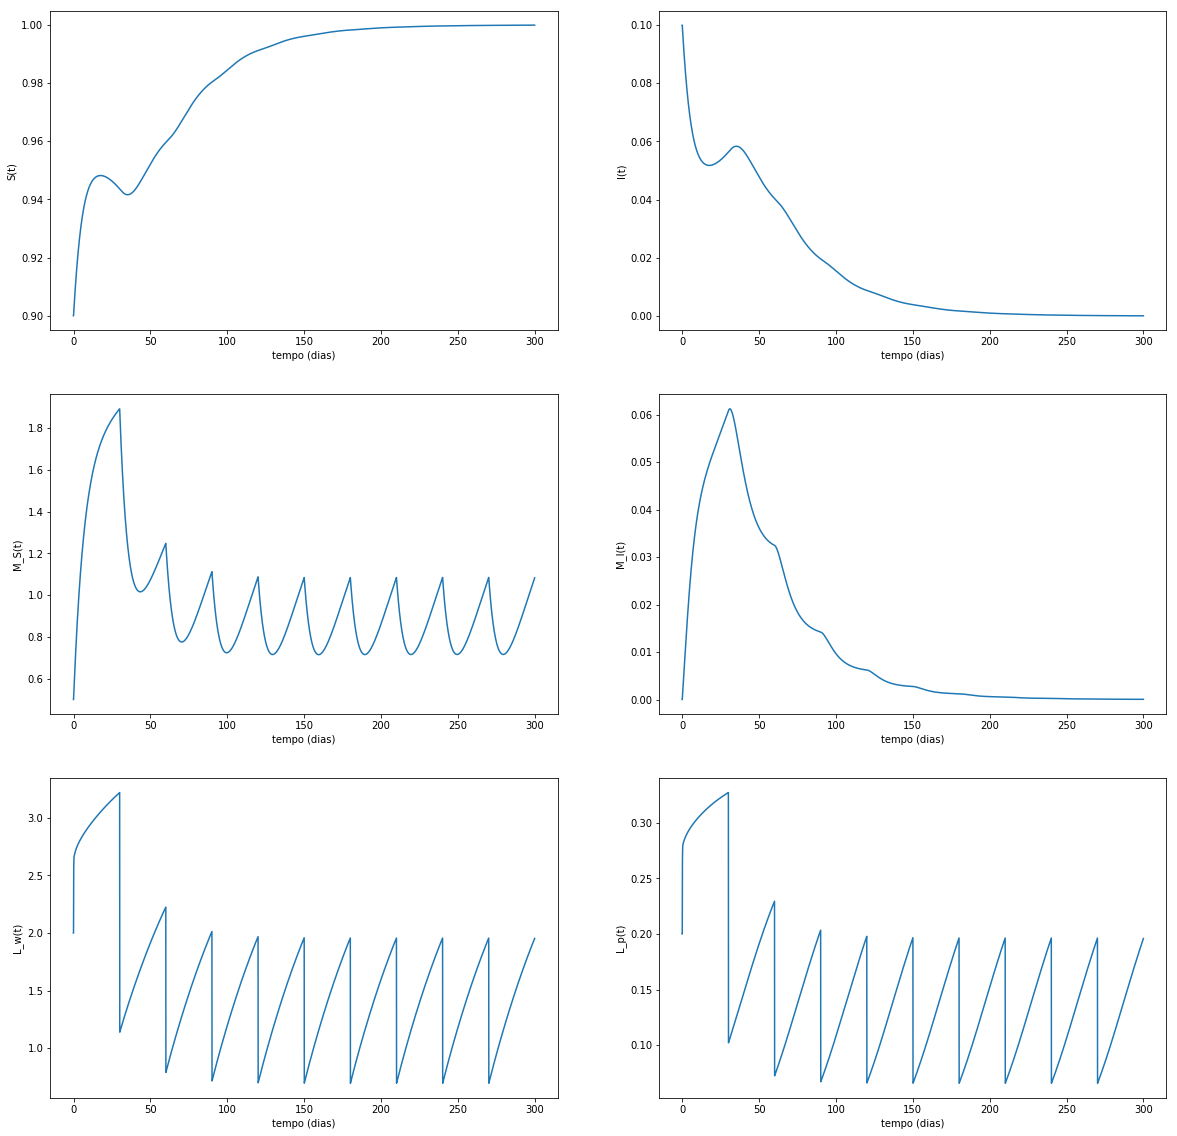

In [100]:

fig, axs = plt.subplots(3,2, figsize=(20, 20))

axs[0, 0].plot(t, y[:,0])
axs[0, 0].set_xlabel('tempo (dias)')
axs[0, 0].set_ylabel('S(t)')

axs[0, 1].plot(t, y[:,1])
axs[0, 1].set_xlabel('tempo (dias)')
axs[0, 1].set_ylabel('I(t)')



axs[1, 0].plot(t, y[:,2])
axs[1, 0].set_xlabel('tempo (dias)')
axs[1, 0].set_ylabel('M_S(t)')


axs[1, 1].plot(t, y[:,3])
axs[1, 1].set_xlabel('tempo (dias)')
axs[1, 1].set_ylabel('M_I(t)')


axs[2, 0].plot(t, y[:,4])
axs[2, 0].set_xlabel('tempo (dias)')
axs[2, 0].set_ylabel('L_w(t)')

axs[2, 1].plot(t, y[:,5])
axs[2, 1].set_xlabel('tempo (dias)')
axs[2, 1].set_ylabel('L_p(t)')



plt.show()

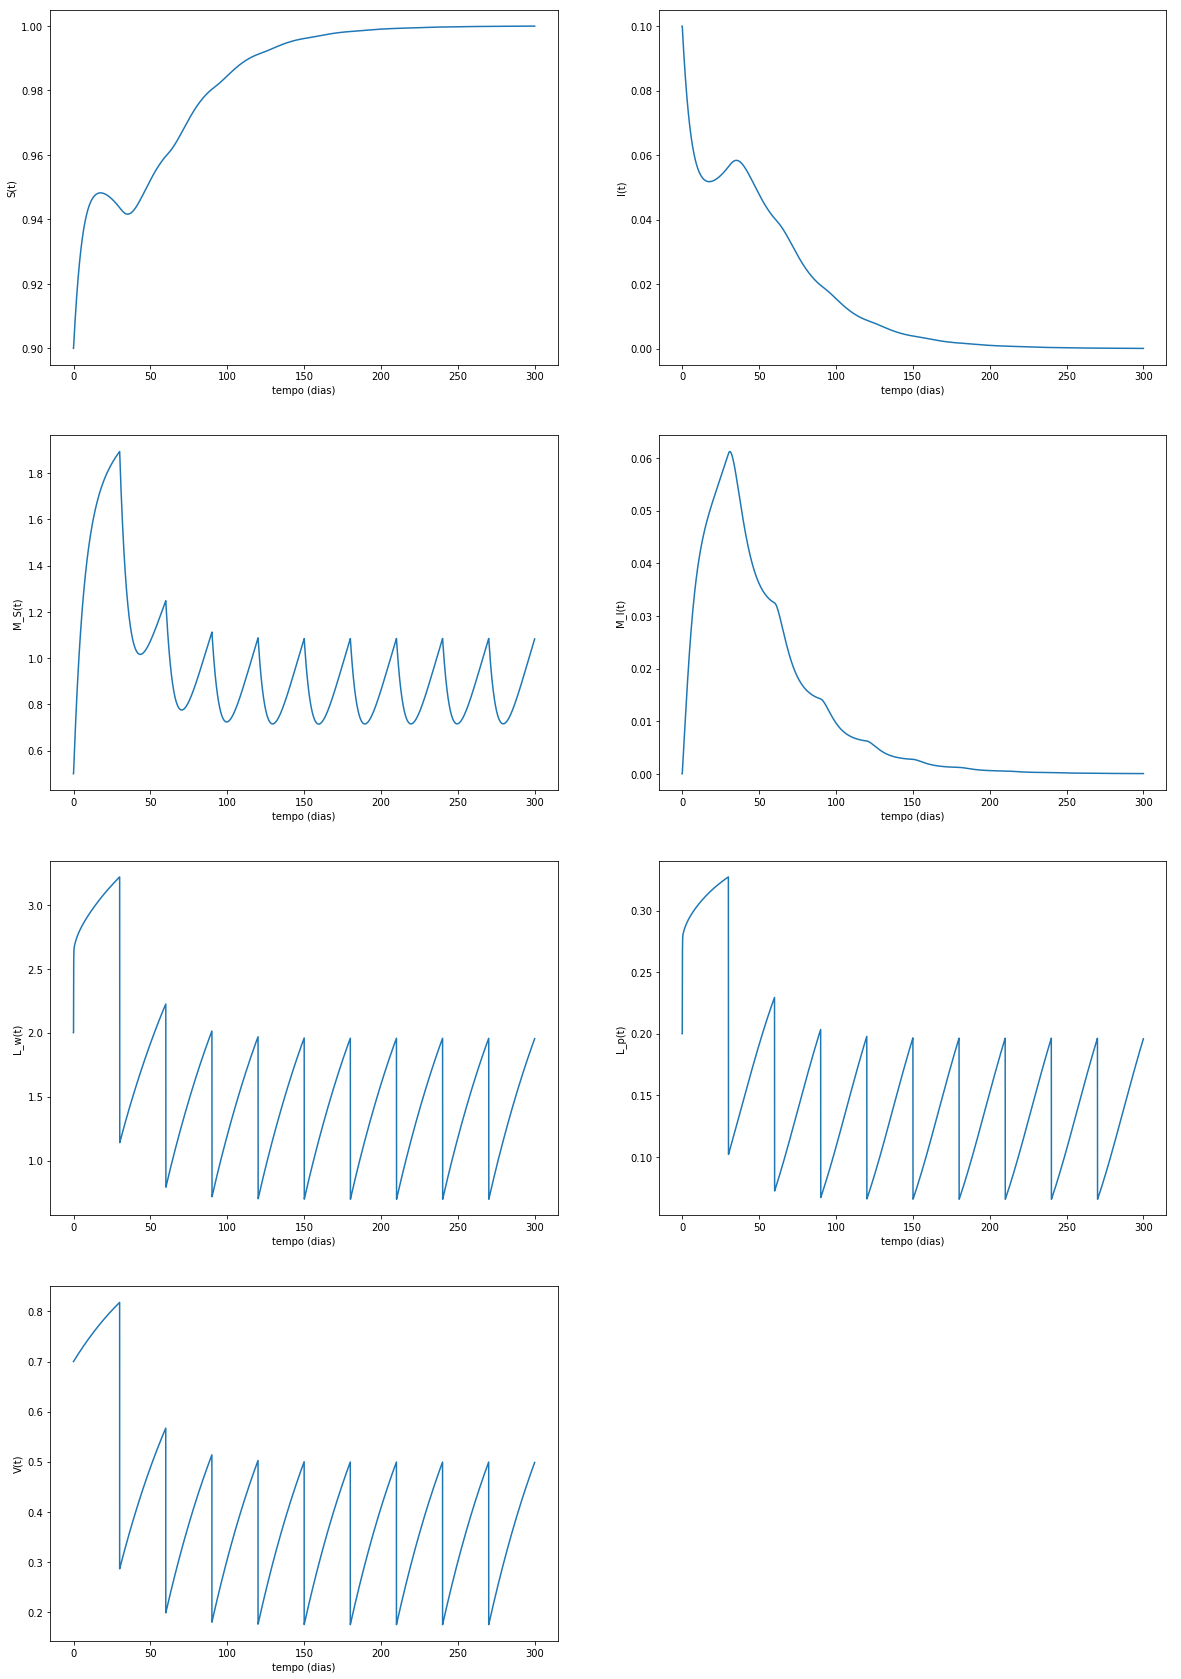

In [106]:

fig, axs = plt.subplots(4,2, figsize=(20, 30))

axs[0, 0].plot(t, y[:,0])
axs[0, 0].set_xlabel('tempo (dias)')
axs[0, 0].set_ylabel('S(t)')

axs[0, 1].plot(t, y[:,1])
axs[0, 1].set_xlabel('tempo (dias)')
axs[0, 1].set_ylabel('I(t)')



axs[1, 0].plot(t, y[:,2])
axs[1, 0].set_xlabel('tempo (dias)')
axs[1, 0].set_ylabel('M_S(t)')


axs[1, 1].plot(t, y[:,3])
axs[1, 1].set_xlabel('tempo (dias)')
axs[1, 1].set_ylabel('M_I(t)')


axs[2, 0].plot(t, y[:,4])
axs[2, 0].set_xlabel('tempo (dias)')
axs[2, 0].set_ylabel('L_w(t)')

axs[2, 1].plot(t, y[:,5])
axs[2, 1].set_xlabel('tempo (dias)')
axs[2, 1].set_ylabel('L_p(t)')

axs[3, 0].plot(t, y[:,6])
axs[3, 0].set_xlabel('tempo (dias)')
axs[3, 0].set_ylabel('V(t)')

axs[3,1].axis("off")


plt.show()

### Valores de Fórmulas (Teorema 3)

$$
    \mathcal{N} = \frac{\alpha \nu}{\mu_M(\nu + \mu_L)}
$$

#### Limit behaviour of Mosquito Population

If $$ \mathcal{N}^{-1} \geq \left[\max_{t\in[0,\tau)} \left(\frac{K_w}{K_p + K_w}(V_{per}(t))\right) + \max_{t\in[0,\tau)} \left(\frac{K_p}{K_p + K_w}(V_{per}(t))\right)\right]$$ then $\lim_{t \to +\infty} X(t) = 0$ for all initial conditions.

If $$ \mathcal{N}^{-1} < \left[\min_{t\in[0,\tau)} \left(\frac{K_w}{K_p + K_w}(V_{per}(t))\right) + \min_{t\in[0,\tau)} \left(\frac{K_p}{K_p + K_w}(V_{per}(t))\right)\right]$$ then there exists a periodic solution which attracts all initial conditions.

In [80]:
# Numerical Calculation
def Mosquito_threshold():
    t = linspace(0, tau, tau*10000)
    print("min = ", np.min(K_w(Veg(t))/(K_p(Veg(t))+K_w(Veg(t)))) + np.min(K_p(Veg(t))/(K_p(Veg(t))+K_w(Veg(t)))),"\n")
    print("max = ", np.max(K_w(Veg(t))/(K_p(Veg(t))+K_w(Veg(t)))) + np.max(K_p(Veg(t))/(K_p(Veg(t))+K_w(Veg(t)))),"\n")
    print("1/basic offspring number = ", ((nu + mu_L)*mu_M)/(alpha*nu),"\n")
    if ((nu + mu_L)*mu_M)/(alpha*nu) >= np.max(K_w(Veg(t))/(K_p(Veg(t))+K_w(Veg(t)))) + np.max(K_p(Veg(t))/(K_p(Veg(t))+K_w(Veg(t)))):
        print("Limit to zero")
    if ((nu + mu_L)*mu_M)/(alpha*nu) < np.min(K_w(Veg(t))/(K_p(Veg(t))+K_w(Veg(t)))) + np.min(K_p(Veg(t))/(K_p(Veg(t))+K_w(Veg(t)))):
        print("Limit to periodic solution")
    return

#### Limit Behaviour of Disease

If $$\frac{\beta_{hv}\beta_{vh} \max_{t \in [0,\tau)} M_{per}(t)}{\kappa \mu_M} \leq 1,$$
            then $\lim_{t \to +\infty} Y(t) = 0$ for all initial conditions.

If $$\frac{\beta_{hv}\beta_{vh} \min_{t \in [0,\tau)} M_{per}(t)}{\kappa \mu_M} > 1,$$
            then there exists a periodic solution which attracts all initial condition.

In [56]:
#Numerical Caculation
def Disease_threshold():
    bigM = y.T[2,-int(tau/step):] + y.T[3,-int(tau/step):]
    print("min = ", beta_hv*beta_vh*np.min(bigM)/(kappa*mu_M),"\n")
    print("max = ", beta_hv*beta_vh*np.max(bigM)/(kappa*mu_M),"\n")
    if beta_hv*beta_vh*np.min(bigM)/(kappa*mu_M) > 1:
        print("periodic solution")
    if beta_hv*beta_vh*np.max(bigM)/(kappa*mu_M) <= 1:
        print("Solution converges to zero")
    return

In [17]:
y.T[2,-int(tau/step):].shape

(3000,)

## Cenário 0:

### Parâmetros

Parâmetros Normais, ie: sem nenhum tipo de comportamento a destacar

In [107]:
#Valor dos Parametros
beta_vh = 0.2 # 0 - 1 per mosquito #
kappa = 1/11 # 1/11 dimensionless
beta_hv = beta_vh # Per Mosquito
mu_M = 0.16 # 0.16 - 0.23 per day
nu = 1/15.6 # 1/15.6 +- 2.86 per day
alpha = 83# 83 +- 48 larvae/per female mosquito
mu_L = 0.62 #0.62 - 0.99 per day - Larvae mortality on ponds without fish
mu_p = 0.31

#Parametros da Vegetação

r = 0.5/30 # 0.5 Por Mês 
gamma = 0.65 # Proporção de vegetação retirada na limpeza
tau = 30 # 30-60 dias
H = 0.05# Pop. realizando Limpeza - <5%

#Valor das Carrying Capacities Maximas
K_w_max = 0.4
K_p_max = 4

In [108]:
1/11

0.09090909090909091

In [109]:
x0 = np.array([0.9,0.1,0.5,0,2,0.2,0.7])#Initial conditions

t = linspace(0, 300, int(300/step)) # Time vector
y = jump_odeint(right_hand_side_v,jump_right_hand_side,x0, t)  # Actual integration with discontiunuities
#y = y[:-11] #discarding times above 30000 cs

In [110]:
#x0 = np.array([0.9,0.1,0.5,0,2,0.2]) #Initial conditions

#t = linspace(0, 300, 30000)                 # Time vector
#y = odeint(right_hand_side, x0, t)         # Actual integration

In [111]:
mu_M*(nu + mu_L)/(alpha*nu)

0.020572530120481925

In [112]:
np.max((K_w(Veg(t))/(K_p(Veg(t))+K_w(Veg(t))))) + np.max((K_p(Veg(t))/(K_p(Veg(t))+K_w(Veg(t)))))

1.0091376793496067

In [113]:
np.min((K_w(Veg(t))/(K_p(Veg(t))+K_w(Veg(t))))) + np.min((K_p(Veg(t))/(K_p(Veg(t))+K_w(Veg(t)))))

0.9908623206503931

In [114]:
Mosquito_threshold()

min =  0.9908620097844657 

max =  1.0091379902155344 

1/basic offspring number =  0.020572530120481925 

Limit to periodic solution


In [115]:
Disease_threshold()

min =  1.9693083683334929 

max =  2.9838370287872795 

periodic solution


Text(0, 0.5, 'proporção de infectados(t)')

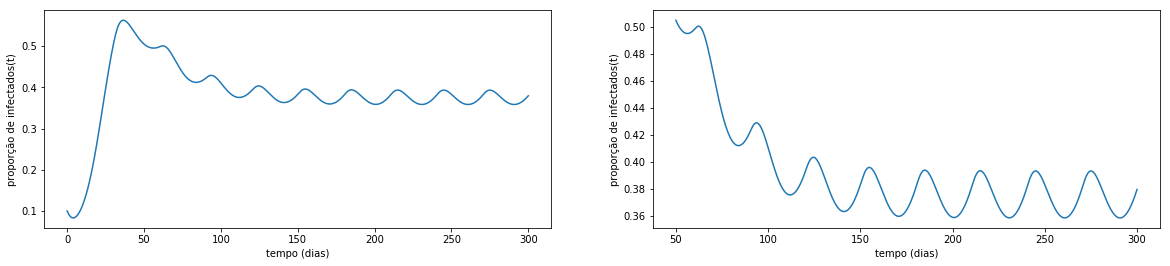

In [116]:
fig, axs = plt.subplots(1,2, figsize=(20, 4))

axs[0].plot(t, y[:,1])
axs[0].set_xlabel('tempo (dias)')
axs[0].set_ylabel('proporção de infectados(t)')

axs[1].plot( t[5000:], y[5000:,1])
axs[1].set_xlabel('tempo (dias)')
axs[1].set_ylabel('proporção de infectados(t)')

In [30]:
y[3000,:]

array([0.49730195, 0.50269805, 1.30705408, 0.64613422, 3.21879125,
       0.32725395, 0.81801351])

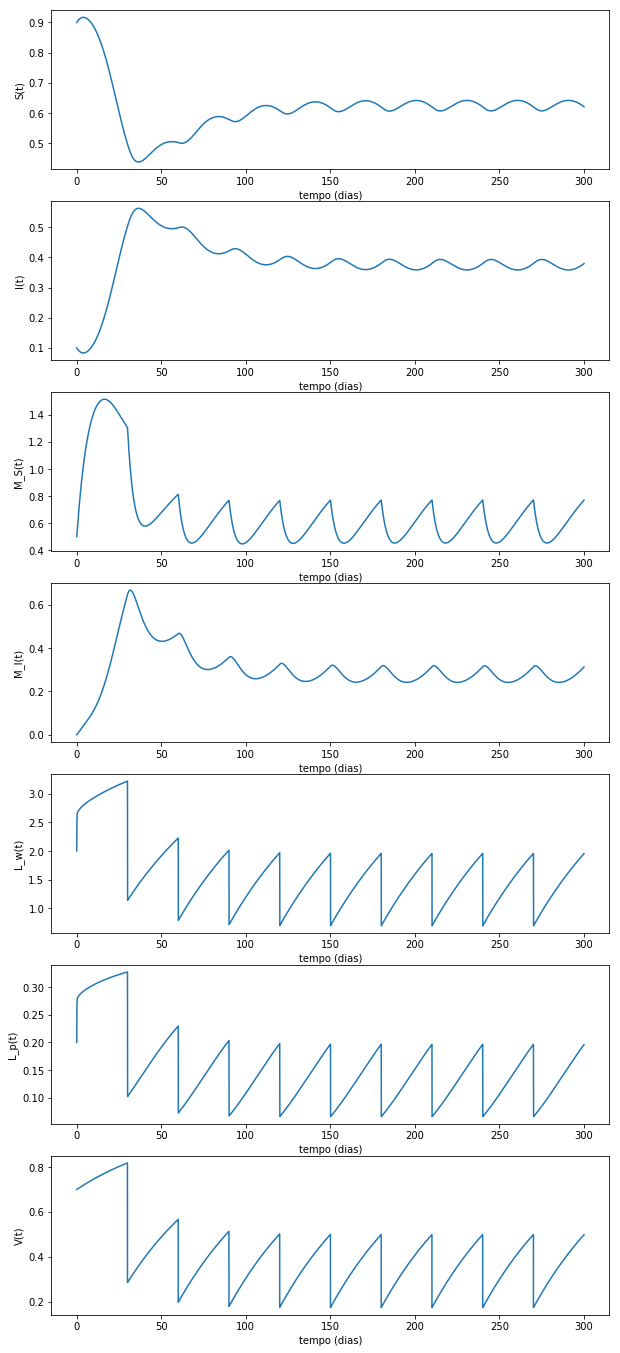

In [31]:
fig, axs = plt.subplots(7,1, figsize=(10, 24))

axs[0].plot(t, y[:,0])
axs[0].set_xlabel('tempo (dias)')
axs[0].set_ylabel('S(t)')


axs[1].plot(t, y[:,1])
axs[1].set_xlabel('tempo (dias)')
axs[1].set_ylabel('I(t)')



axs[2].plot(t, y[:,2])
axs[2].set_xlabel('tempo (dias)')
axs[2].set_ylabel('M_S(t)')


axs[3].plot(t, y[:,3])
axs[3].set_xlabel('tempo (dias)')
axs[3].set_ylabel('M_I(t)')


axs[4].plot(t, y[:,4])
axs[4].set_xlabel('tempo (dias)')
axs[4].set_ylabel('L_w(t)')

axs[5].plot(t, y[:,5])
axs[5].set_xlabel('tempo (dias)')
axs[5].set_ylabel('L_p(t)')

axs[6].plot(t, y[:,6])
axs[6].set_xlabel('tempo (dias)')
axs[6].set_ylabel('V(t)')



plt.show()

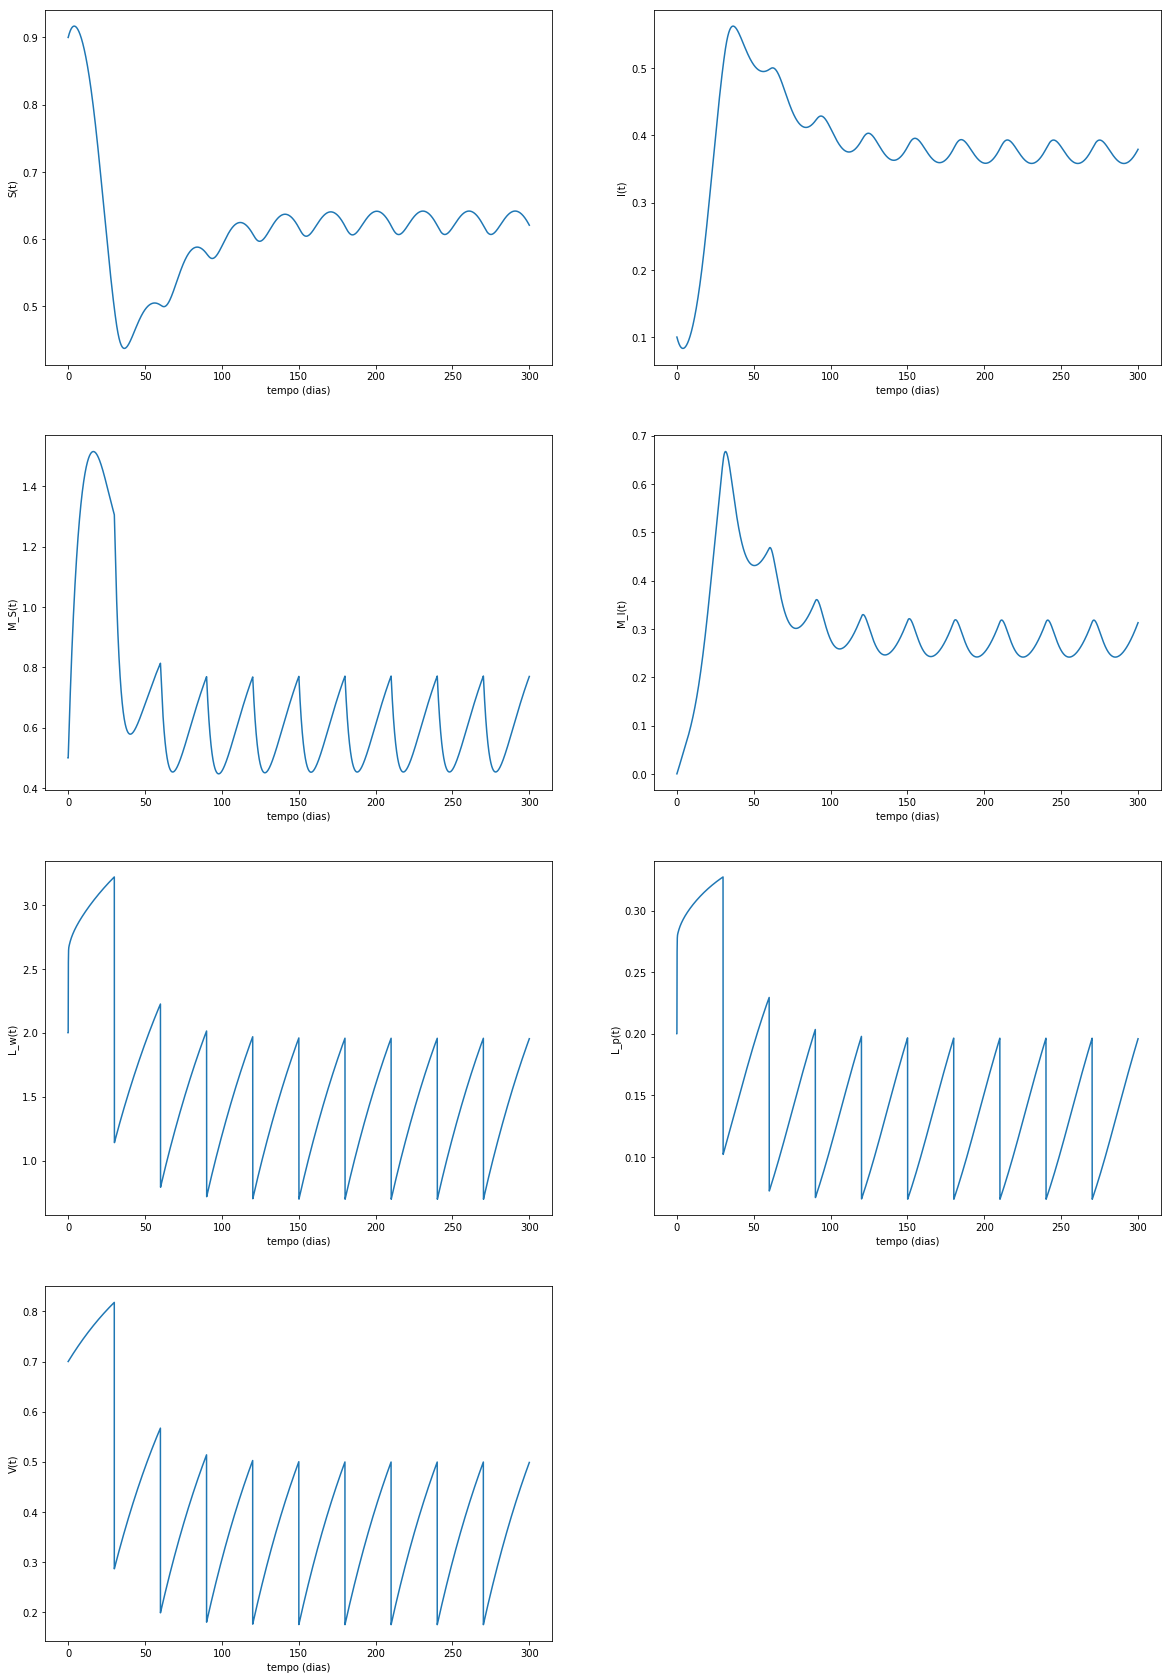

In [117]:

fig, axs = plt.subplots(4,2, figsize=(20, 30))

axs[0, 0].plot(t, y[:,0])
axs[0, 0].set_xlabel('tempo (dias)')
axs[0, 0].set_ylabel('S(t)')

axs[0, 1].plot(t, y[:,1])
axs[0, 1].set_xlabel('tempo (dias)')
axs[0, 1].set_ylabel('I(t)')



axs[1, 0].plot(t, y[:,2])
axs[1, 0].set_xlabel('tempo (dias)')
axs[1, 0].set_ylabel('M_S(t)')


axs[1, 1].plot(t, y[:,3])
axs[1, 1].set_xlabel('tempo (dias)')
axs[1, 1].set_ylabel('M_I(t)')


axs[2, 0].plot(t, y[:,4])
axs[2, 0].set_xlabel('tempo (dias)')
axs[2, 0].set_ylabel('L_w(t)')

axs[2, 1].plot(t, y[:,5])
axs[2, 1].set_xlabel('tempo (dias)')
axs[2, 1].set_ylabel('L_p(t)')

axs[3, 0].plot(t, y[:,6])
axs[3, 0].set_xlabel('tempo (dias)')
axs[3, 0].set_ylabel('V(t)')

axs[3,1].axis("off")


plt.show()

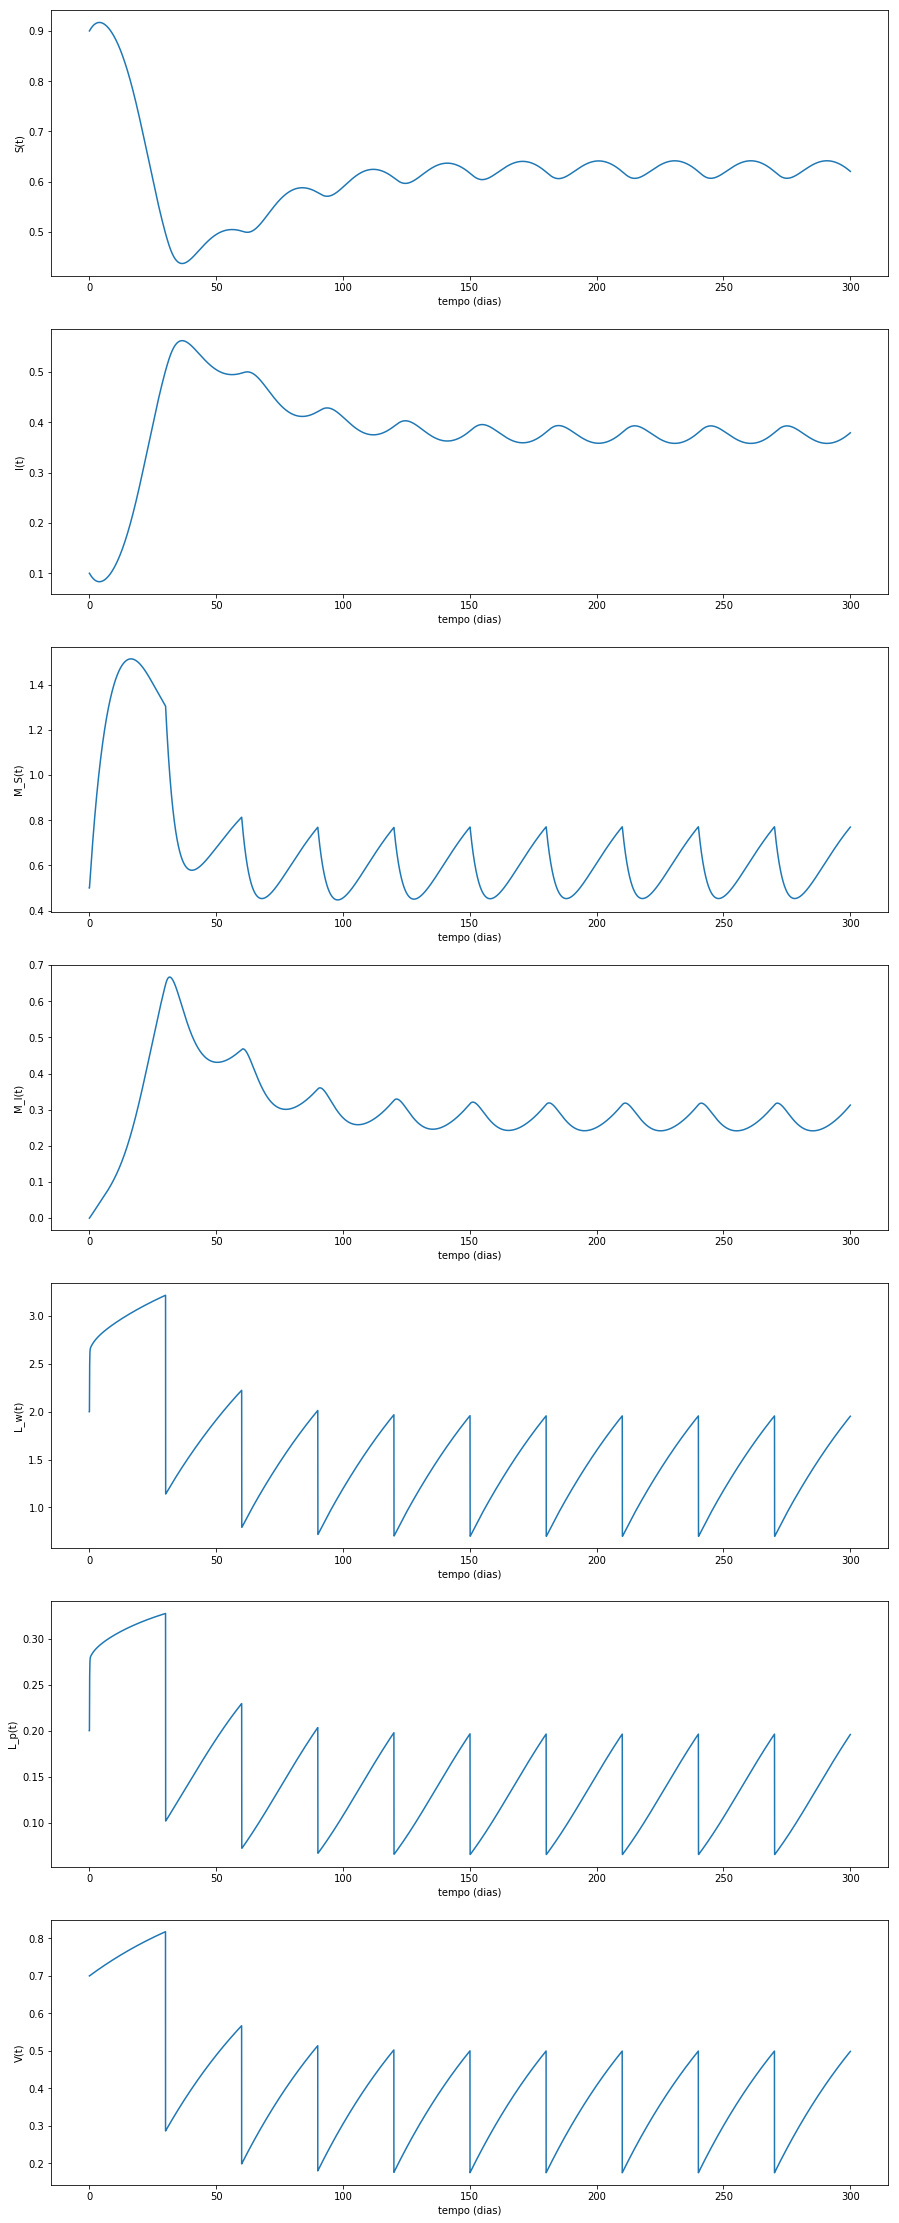

In [30]:
fig, axs = plt.subplots(7,1, figsize=(20, 40))

axs[0].plot(t, y[:,0])
axs[0].set_xlabel('tempo (dias)')
axs[0].set_ylabel('S(t)')


axs[1].plot(t, y[:,1])
axs[1].set_xlabel('tempo (dias)')
axs[1].set_ylabel('I(t)')



axs[2].plot(t, y[:,2])
axs[2].set_xlabel('tempo (dias)')
axs[2].set_ylabel('M_S(t)')


axs[3].plot(t, y[:,3])
axs[3].set_xlabel('tempo (dias)')
axs[3].set_ylabel('M_I(t)')


axs[4].plot(t, y[:,4])
axs[4].set_xlabel('tempo (dias)')
axs[4].set_ylabel('L_w(t)')

axs[5].plot(t, y[:,5])
axs[5].set_xlabel('tempo (dias)')
axs[5].set_ylabel('L_p(t)')

axs[6].plot(t, y[:,6])
axs[6].set_xlabel('tempo (dias)')
axs[6].set_ylabel('V(t)')



plt.show()

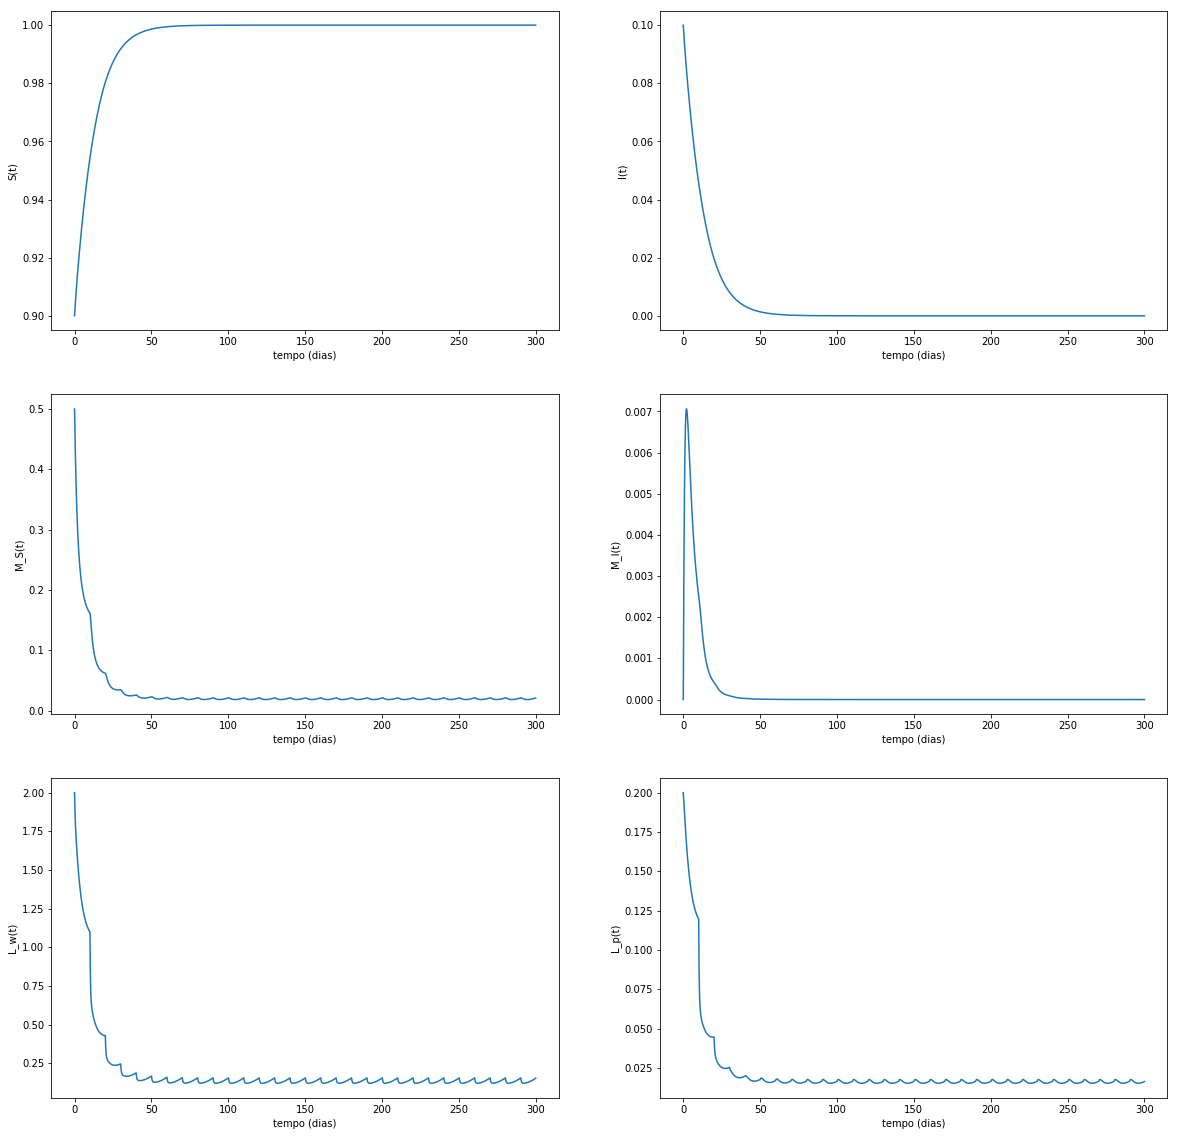

In [45]:

fig, axs = plt.subplots(3,2, figsize=(20, 20))

axs[0, 0].plot(t, y[:,0])
axs[0, 0].set_xlabel('tempo (dias)')
axs[0, 0].set_ylabel('S(t)')

axs[0, 1].plot(t, y[:,1])
axs[0, 1].set_xlabel('tempo (dias)')
axs[0, 1].set_ylabel('I(t)')



axs[1, 0].plot(t, y[:,2])
axs[1, 0].set_xlabel('tempo (dias)')
axs[1, 0].set_ylabel('M_S(t)')


axs[1, 1].plot(t, y[:,3])
axs[1, 1].set_xlabel('tempo (dias)')
axs[1, 1].set_ylabel('M_I(t)')


axs[2, 0].plot(t, y[:,4])
axs[2, 0].set_xlabel('tempo (dias)')
axs[2, 0].set_ylabel('L_w(t)')

axs[2, 1].plot(t, y[:,5])
axs[2, 1].set_xlabel('tempo (dias)')
axs[2, 1].set_ylabel('L_p(t)')



plt.show()

## Cenário 1

Mosquito tendendo a zero

In [139]:
#Valor dos Parametros
beta_vh = 0.2 # 0 - 1 per mosquito #
kappa = 1/11 # 1/11 dimensionless
beta_hv = beta_vh # Per Mosquito
mu_p = 0.31

mu_M = 0.70 # 0.16 - 0.23 per day
mu_L = 0.99 #0.62 - 0.99 per day - Larvae mortality on ponds without fish

nu = 1/(15.6 + 2.86) # 1/15.6 +- 2.86 per day


alpha = 83 - 70 # 83 +- 48 larvae/per female mosquito


#Parametros da Vegetação

r = 0.5/30 # 0.5 Por Mês 
gamma = 0.65 # Proporção de vegetação retirada na limpeza
tau = 10 # 30-60 dias
H = 0.05# Pop. realizando Limpeza - <5%

#Valor das Carrying Capacities Maximas
K_w_max = 0.4
K_p_max = 4

#x0 = np.array([0.9,0.1,0.5,0,9.588,9.588]) #Initial conditions

#t = linspace(0, 300, 30000)                 # Time vector
#y = odeint(right_hand_side, x0, t)         # Actual integration

In [140]:
x0 = np.array([0.9,0.1,0.5,0,2,0.2,0.7])

t = linspace(0, 300, int(300/step))
y = jump_odeint(right_hand_side_v,jump_right_hand_side,x0, t)
#y = y[:-31]

In [141]:
Mosquito_threshold()

min =  0.9593217049231869 

max =  1.0406782950768132 

1/basic offspring number =  1.0379061538461536 



In [142]:
mu_M*(nu + mu_L)/(alpha*nu)

1.0379061538461536

In [143]:
np.max((K_w(Veg(t))/(K_p(Veg(t))+K_w(Veg(t))))) + np.max((K_p(Veg(t))/(K_p(Veg(t))+K_w(Veg(t)))))

1.0406781647367296

In [144]:
Disease_threshold()

min =  0.01144056669960731 

max =  0.013263504434488002 

Solution converges to zero


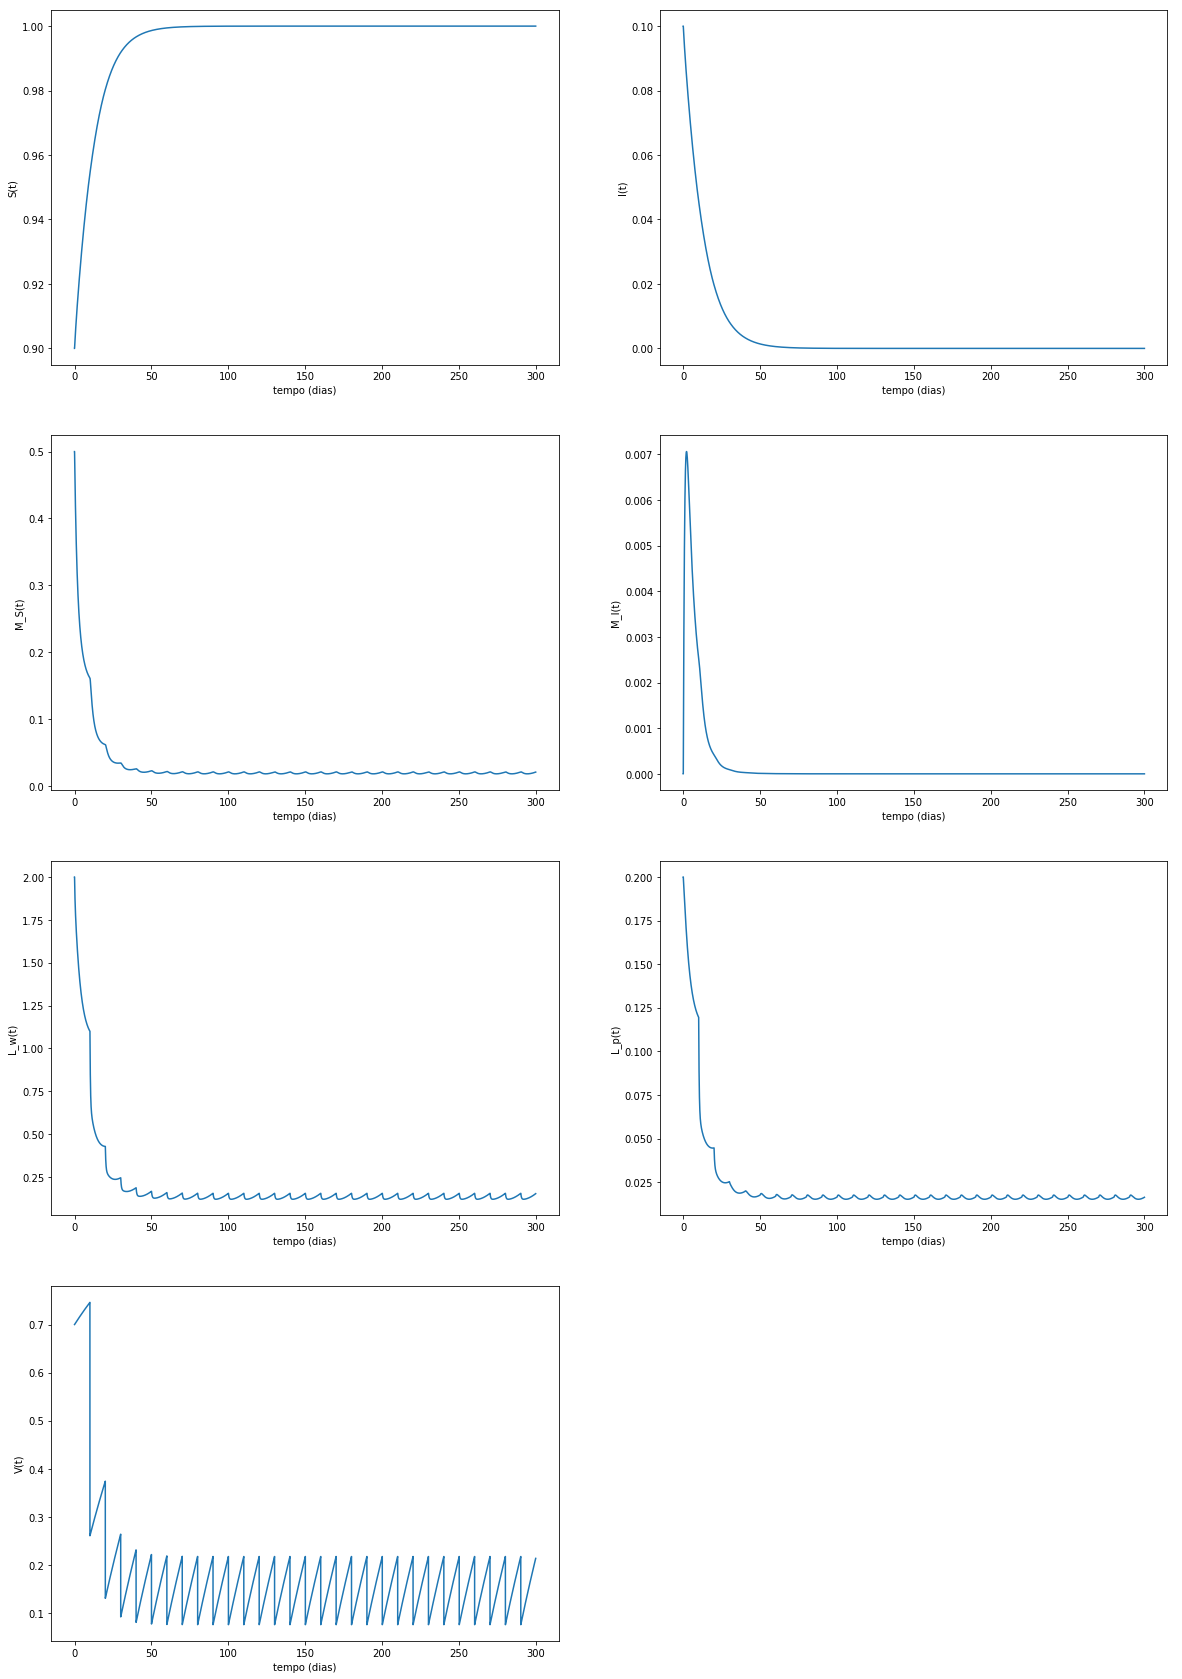

In [145]:

fig, axs = plt.subplots(4,2, figsize=(20, 30))

axs[0, 0].plot(t, y[:,0])
axs[0, 0].set_xlabel('tempo (dias)')
axs[0, 0].set_ylabel('S(t)')

axs[0, 1].plot(t, y[:,1])
axs[0, 1].set_xlabel('tempo (dias)')
axs[0, 1].set_ylabel('I(t)')



axs[1, 0].plot(t, y[:,2])
axs[1, 0].set_xlabel('tempo (dias)')
axs[1, 0].set_ylabel('M_S(t)')


axs[1, 1].plot(t, y[:,3])
axs[1, 1].set_xlabel('tempo (dias)')
axs[1, 1].set_ylabel('M_I(t)')


axs[2, 0].plot(t, y[:,4])
axs[2, 0].set_xlabel('tempo (dias)')
axs[2, 0].set_ylabel('L_w(t)')

axs[2, 1].plot(t, y[:,5])
axs[2, 1].set_xlabel('tempo (dias)')
axs[2, 1].set_ylabel('L_p(t)')

axs[3, 0].plot(t, y[:,6])
axs[3, 0].set_xlabel('tempo (dias)')
axs[3, 0].set_ylabel('V(t)')

axs[3,1].axis("off")


plt.show()

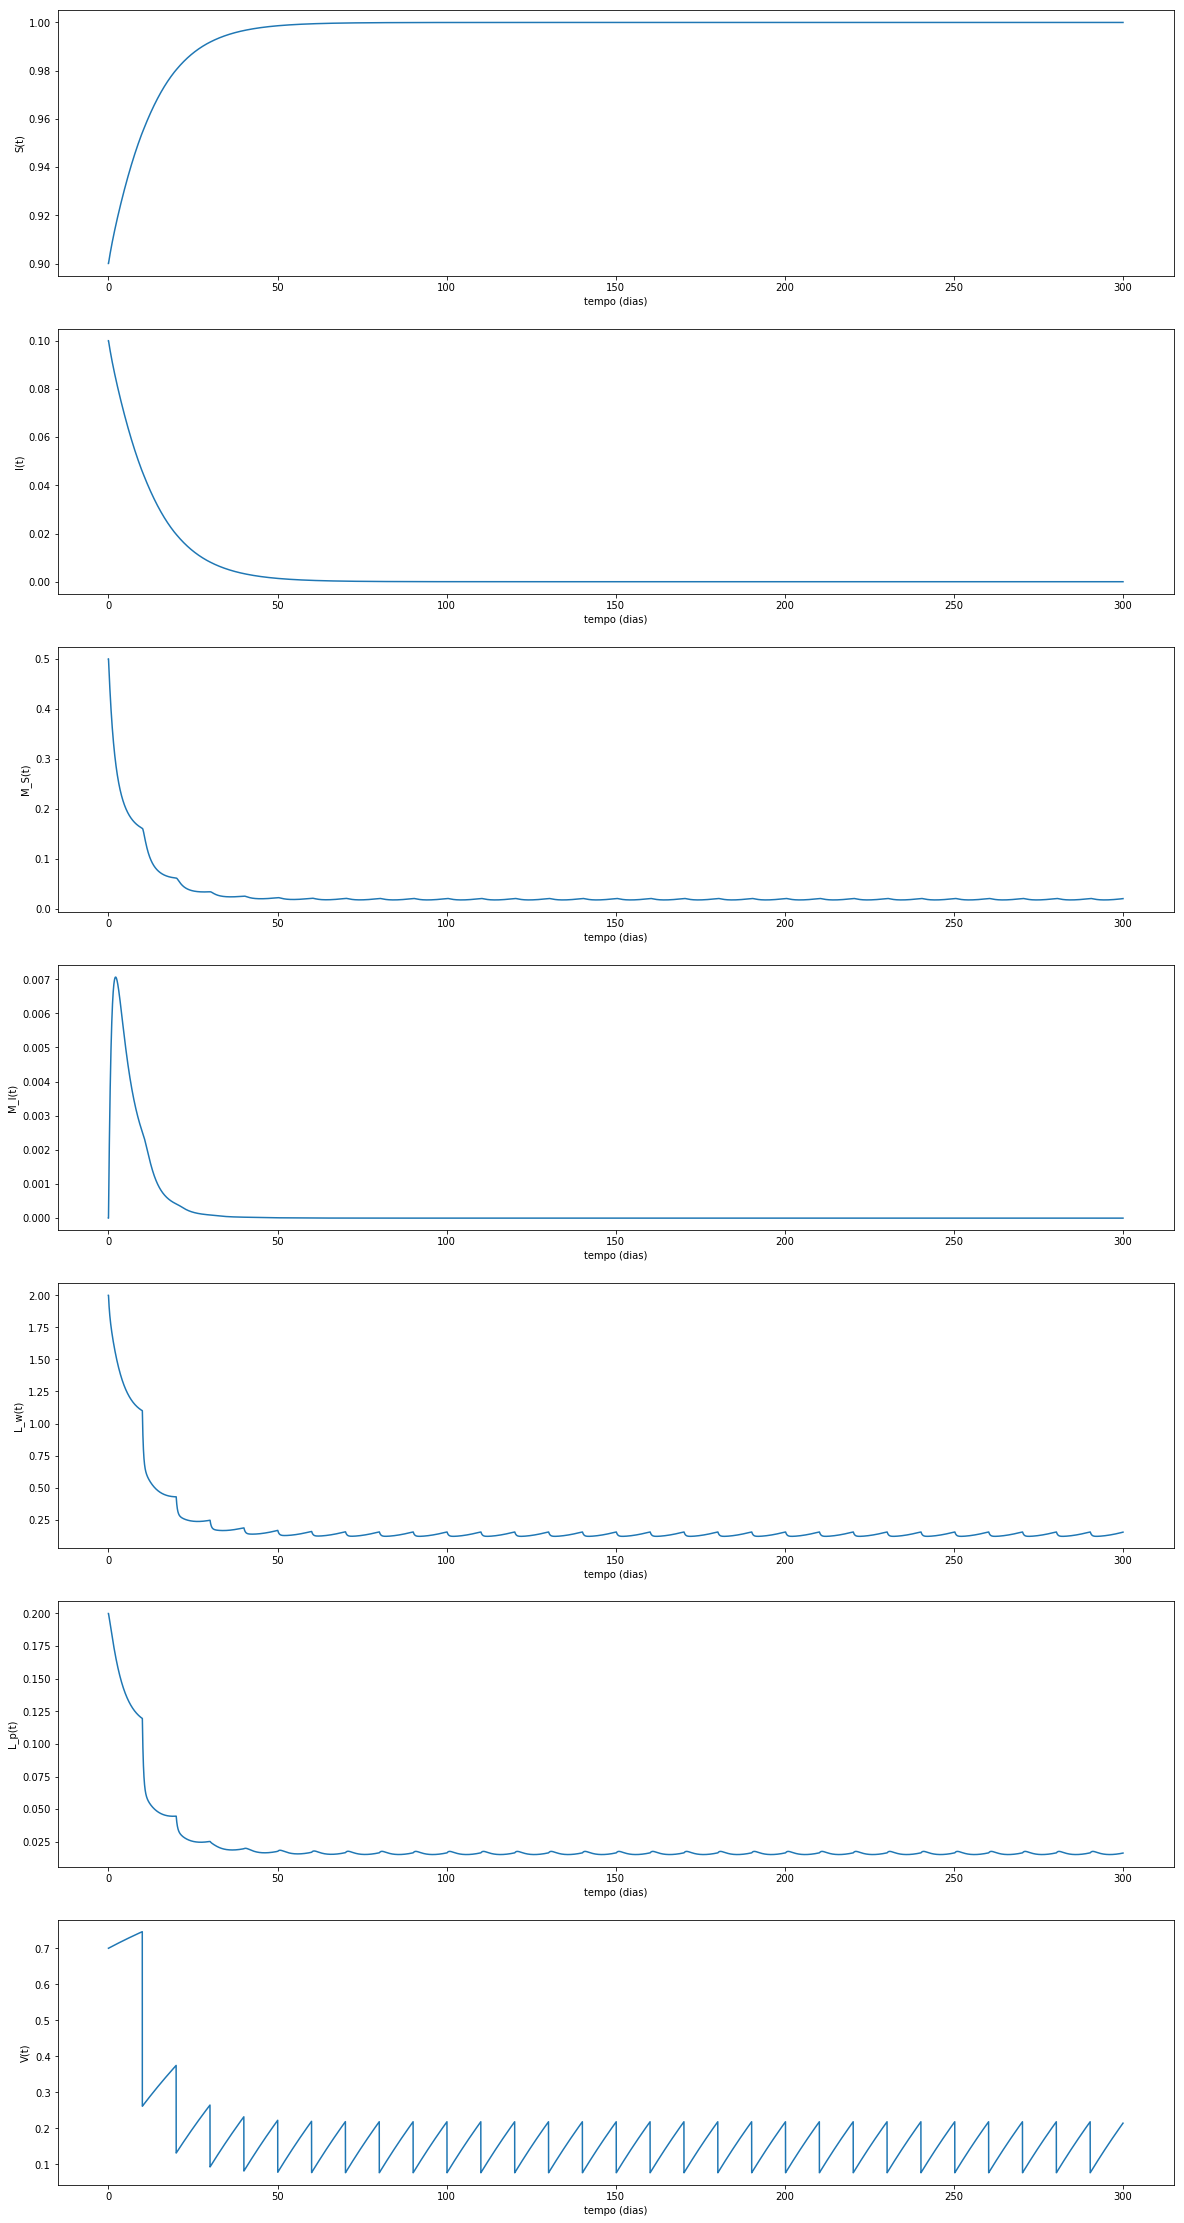

In [43]:
fig, axs = plt.subplots(7,1, figsize=(20, 40))

axs[0].plot(t, y[:,0])
axs[0].set_xlabel('tempo (dias)')
axs[0].set_ylabel('S(t)')


axs[1].plot(t, y[:,1])
axs[1].set_xlabel('tempo (dias)')
axs[1].set_ylabel('I(t)')



axs[2].plot(t, y[:,2])
axs[2].set_xlabel('tempo (dias)')
axs[2].set_ylabel('M_S(t)')


axs[3].plot(t, y[:,3])
axs[3].set_xlabel('tempo (dias)')
axs[3].set_ylabel('M_I(t)')


axs[4].plot(t, y[:,4])
axs[4].set_xlabel('tempo (dias)')
axs[4].set_ylabel('L_w(t)')

axs[5].plot(t, y[:,5])
axs[5].set_xlabel('tempo (dias)')
axs[5].set_ylabel('L_p(t)')

axs[6].plot(t, y[:,6])
axs[6].set_xlabel('tempo (dias)')
axs[6].set_ylabel('V(t)')



plt.show()

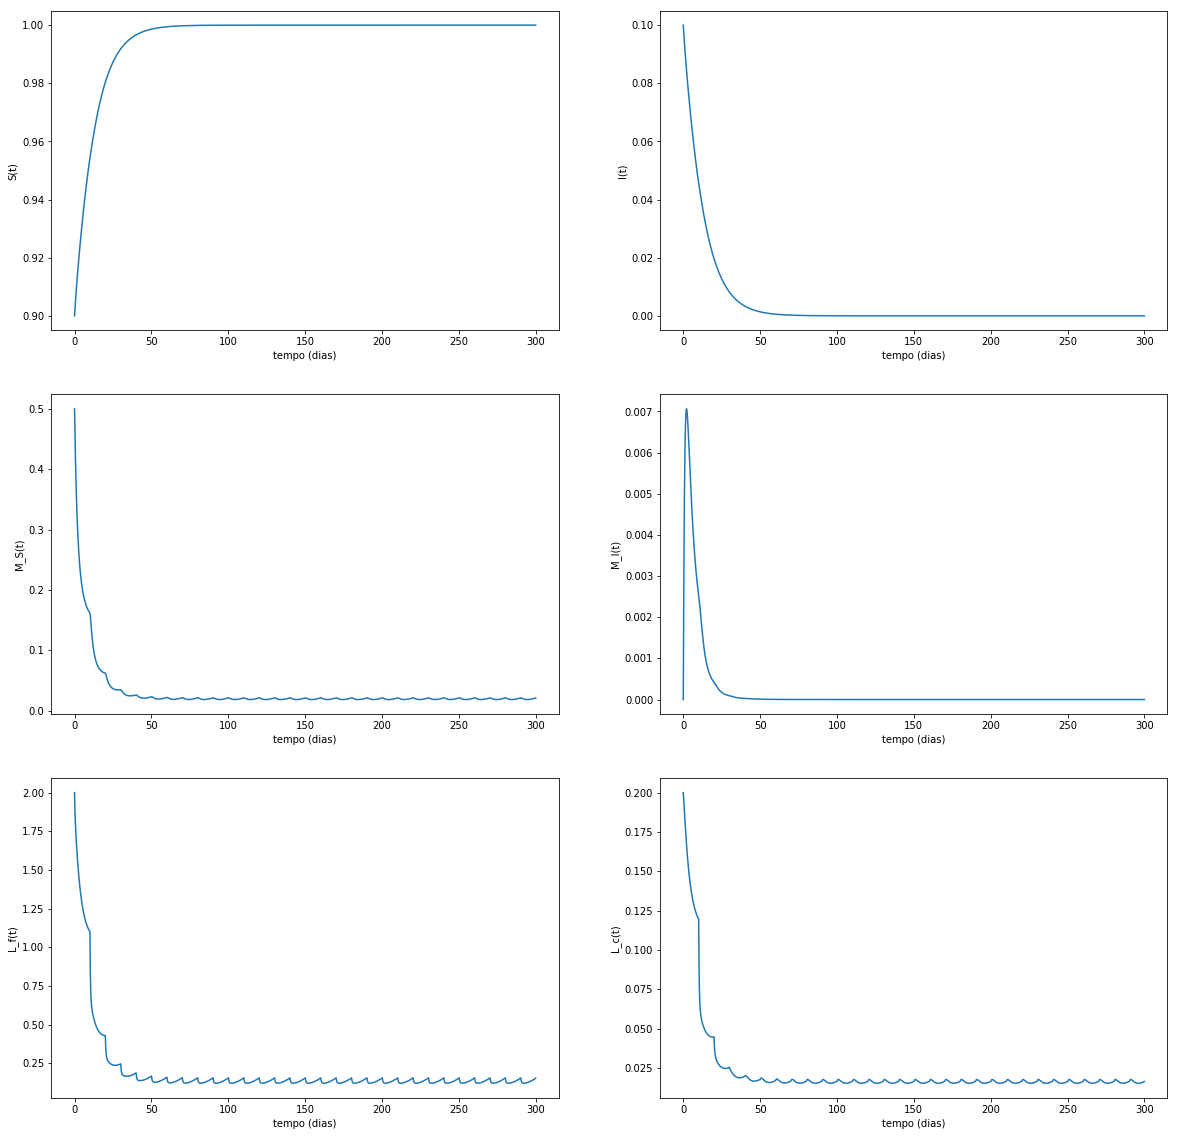

In [42]:

fig, axs = plt.subplots(3,2, figsize=(20, 20))

axs[0, 0].plot(t, y[:,0])
axs[0, 0].set_xlabel('tempo (dias)')
axs[0, 0].set_ylabel('S(t)')

axs[0, 1].plot(t, y[:,1])
axs[0, 1].set_xlabel('tempo (dias)')
axs[0, 1].set_ylabel('I(t)')



axs[1, 0].plot(t, y[:,2])
axs[1, 0].set_xlabel('tempo (dias)')
axs[1, 0].set_ylabel('M_S(t)')


axs[1, 1].plot(t, y[:,3])
axs[1, 1].set_xlabel('tempo (dias)')
axs[1, 1].set_ylabel('M_I(t)')


axs[2, 0].plot(t, y[:,4])
axs[2, 0].set_xlabel('tempo (dias)')
axs[2, 0].set_ylabel('L_f(t)')

axs[2, 1].plot(t, y[:,5])
axs[2, 1].set_xlabel('tempo (dias)')
axs[2, 1].set_ylabel('L_c(t)')

#axs[0, 3].plot(t, V(t))
#axs[0, 3].set_xlabel('tempo (dias)')
#axs[0, 3].set_ylabel('V(t)')


plt.show()

Text(0, 0.5, 'População de Mosquitos(t)')

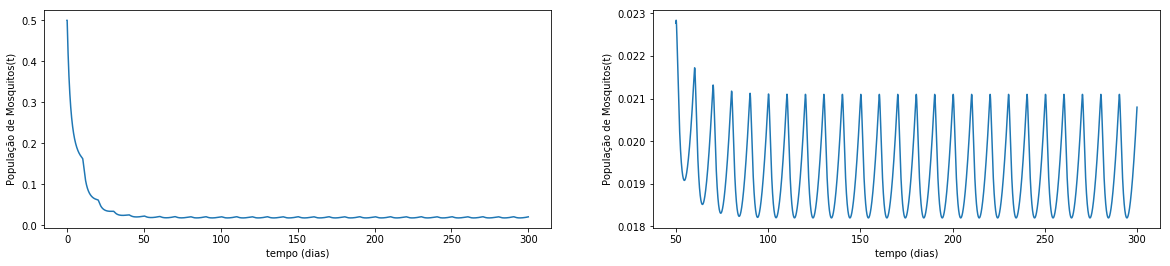

In [46]:
fig, axs = plt.subplots(1,2, figsize=(20, 4))

axs[0].plot(t, y[:,2]+y[:,3])
axs[0].set_xlabel('tempo (dias)')
axs[0].set_ylabel('População de Mosquitos(t)')

axs[1].plot( t[5000:], y[5000:,2]+y[5000:,3])
axs[1].set_xlabel('tempo (dias)')
axs[1].set_ylabel('População de Mosquitos(t)')

In [53]:
y[3000,:]

array([9.91823955e-01, 8.17604475e-03, 3.45180103e-02, 9.28306998e-05,
       2.45501900e-01, 2.53171344e-02, 2.64088765e-01])

O teste do teorema é inconclusivo. Podemos observar nas simulações que a população total de mosquitos tende para um resultado periódico, porém próximo de zero

## Cenário 1.1

In [125]:
#Valor dos Parametros
beta_vh = 0.2 # 0 - 1 per mosquito #
kappa = 1/11 # 1/11 dimensionless
beta_hv = beta_vh # Per Mosquito
mu_p = 0.31

mu_M = 0.70 # 0.16 - 0.23 per day
mu_L = 0.99 #0.62 - 0.99 per day - Larvae mortality on ponds without fish

nu = 1/(15.6 + 2.86) # 1/15.6 +- 2.86 per day


alpha = 83 - 74 # 83 +- 48 larvae/per female mosquito


#Parametros da Vegetação

r = 0.5/30 # 0.5 Por Mês 
gamma = 0.65 # Proporção de vegetação retirada na limpeza
tau = 10 # 30-60 dias
H = 0.05# Pop. realizando Limpeza - <5%

#Valor das Carrying Capacities Maximas
K_w_max = 0.4
K_p_max = 4


#x0 = np.array([0.9,0.1,0.5,0,9.588,9.588]) #Initial conditions

#t = linspace(0, 300, 30000)                 # Time vector
#y = odeint(right_hand_side, x0, t)         # Actual integration

In [126]:
x0 = np.array([0.9,0.1,0.5,0,2,0.2,0.7])

t = linspace(0, 300, int(300/step))
y = jump_odeint(right_hand_side_v,jump_right_hand_side,x0, t)



In [127]:
mu_M*(nu + mu_L)/(alpha*nu)

1.4991977777777774

In [128]:
np.max((K_w(Veg(t))/(K_p(Veg(t))+K_w(Veg(t))))) + np.max((K_p(Veg(t))/(K_p(Veg(t))+K_w(Veg(t)))))

1.0406781647367296

In [129]:
Mosquito_threshold()

min =  0.9593217049231869 

max =  1.0406782950768132 

1/basic offspring number =  1.4991977777777774 

Limit to zero


In [130]:
Disease_threshold()

min =  7.191707499467141e-08 

max =  1.0676313647997746e-07 

Solution converges to zero


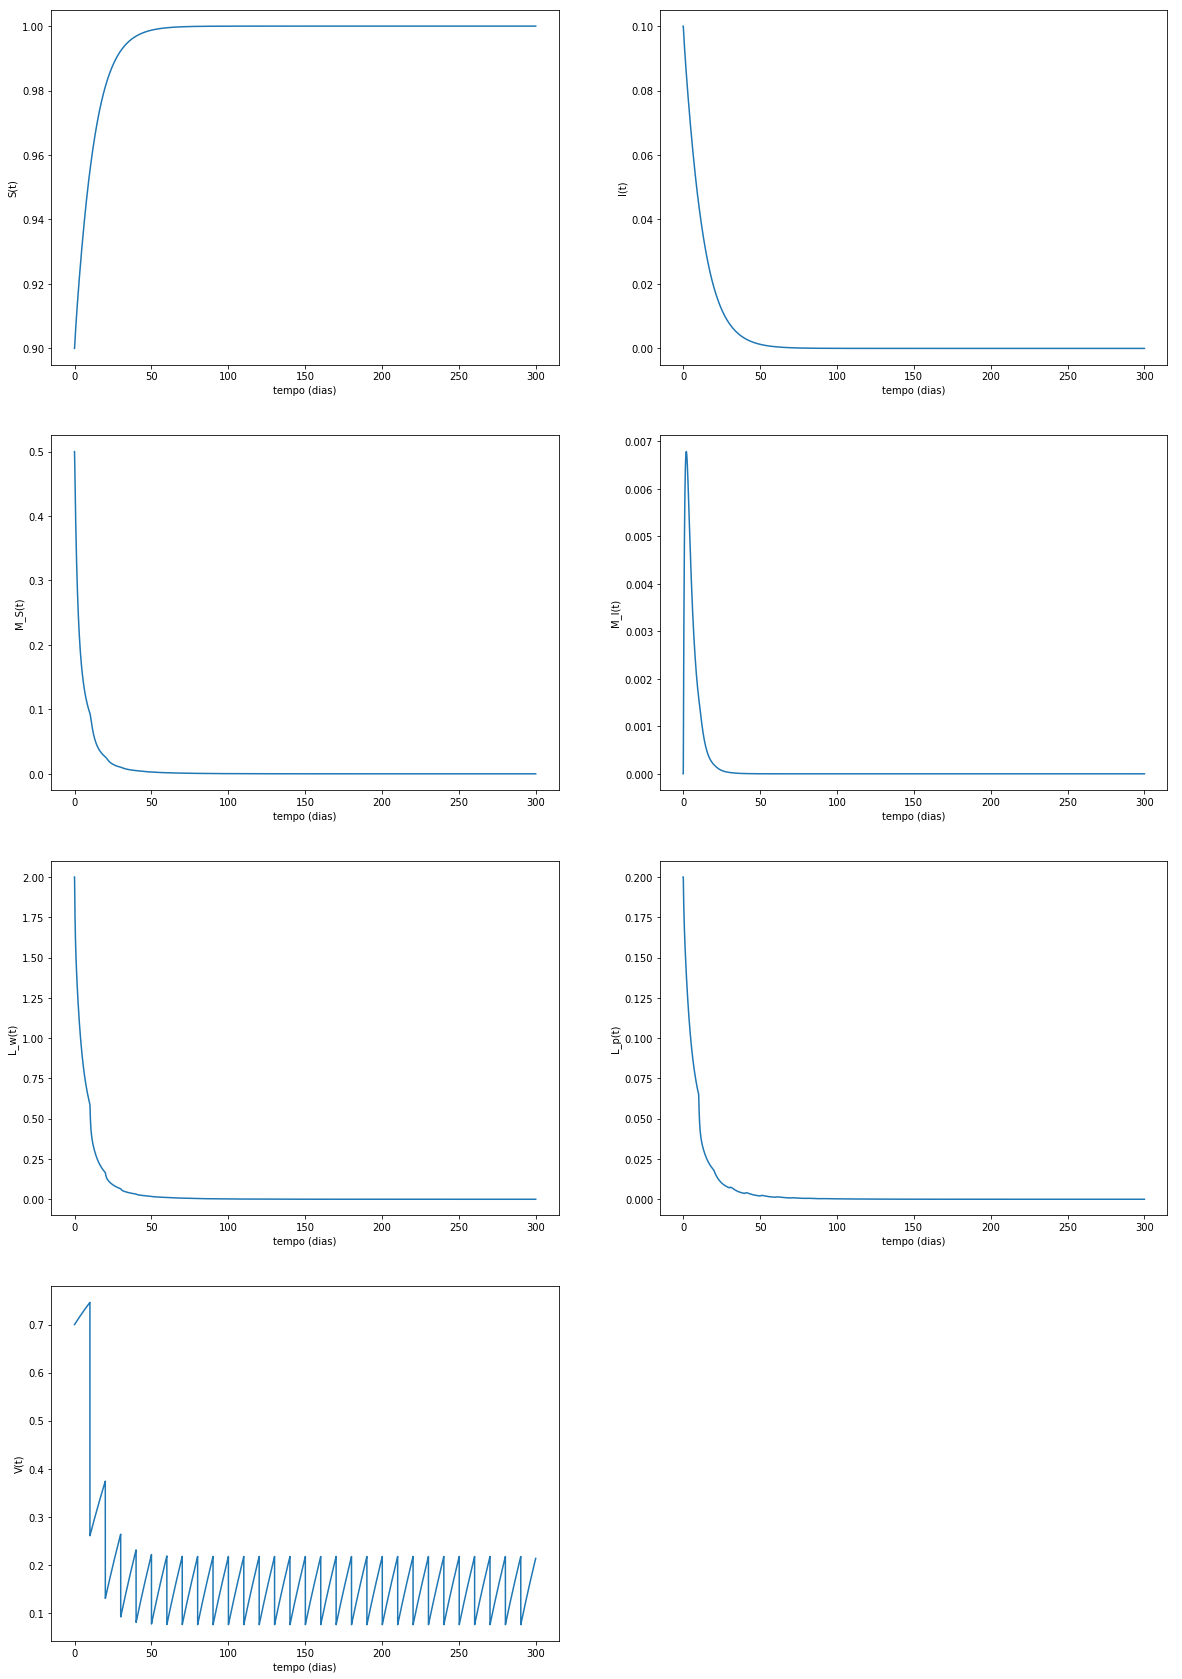

In [131]:

fig, axs = plt.subplots(4,2, figsize=(20, 30))

axs[0, 0].plot(t, y[:,0])
axs[0, 0].set_xlabel('tempo (dias)')
axs[0, 0].set_ylabel('S(t)')

axs[0, 1].plot(t, y[:,1])
axs[0, 1].set_xlabel('tempo (dias)')
axs[0, 1].set_ylabel('I(t)')



axs[1, 0].plot(t, y[:,2])
axs[1, 0].set_xlabel('tempo (dias)')
axs[1, 0].set_ylabel('M_S(t)')


axs[1, 1].plot(t, y[:,3])
axs[1, 1].set_xlabel('tempo (dias)')
axs[1, 1].set_ylabel('M_I(t)')


axs[2, 0].plot(t, y[:,4])
axs[2, 0].set_xlabel('tempo (dias)')
axs[2, 0].set_ylabel('L_w(t)')

axs[2, 1].plot(t, y[:,5])
axs[2, 1].set_xlabel('tempo (dias)')
axs[2, 1].set_ylabel('L_p(t)')

axs[3, 0].plot(t, y[:,6])
axs[3, 0].set_xlabel('tempo (dias)')
axs[3, 0].set_ylabel('V(t)')

axs[3,1].axis("off")


plt.show()

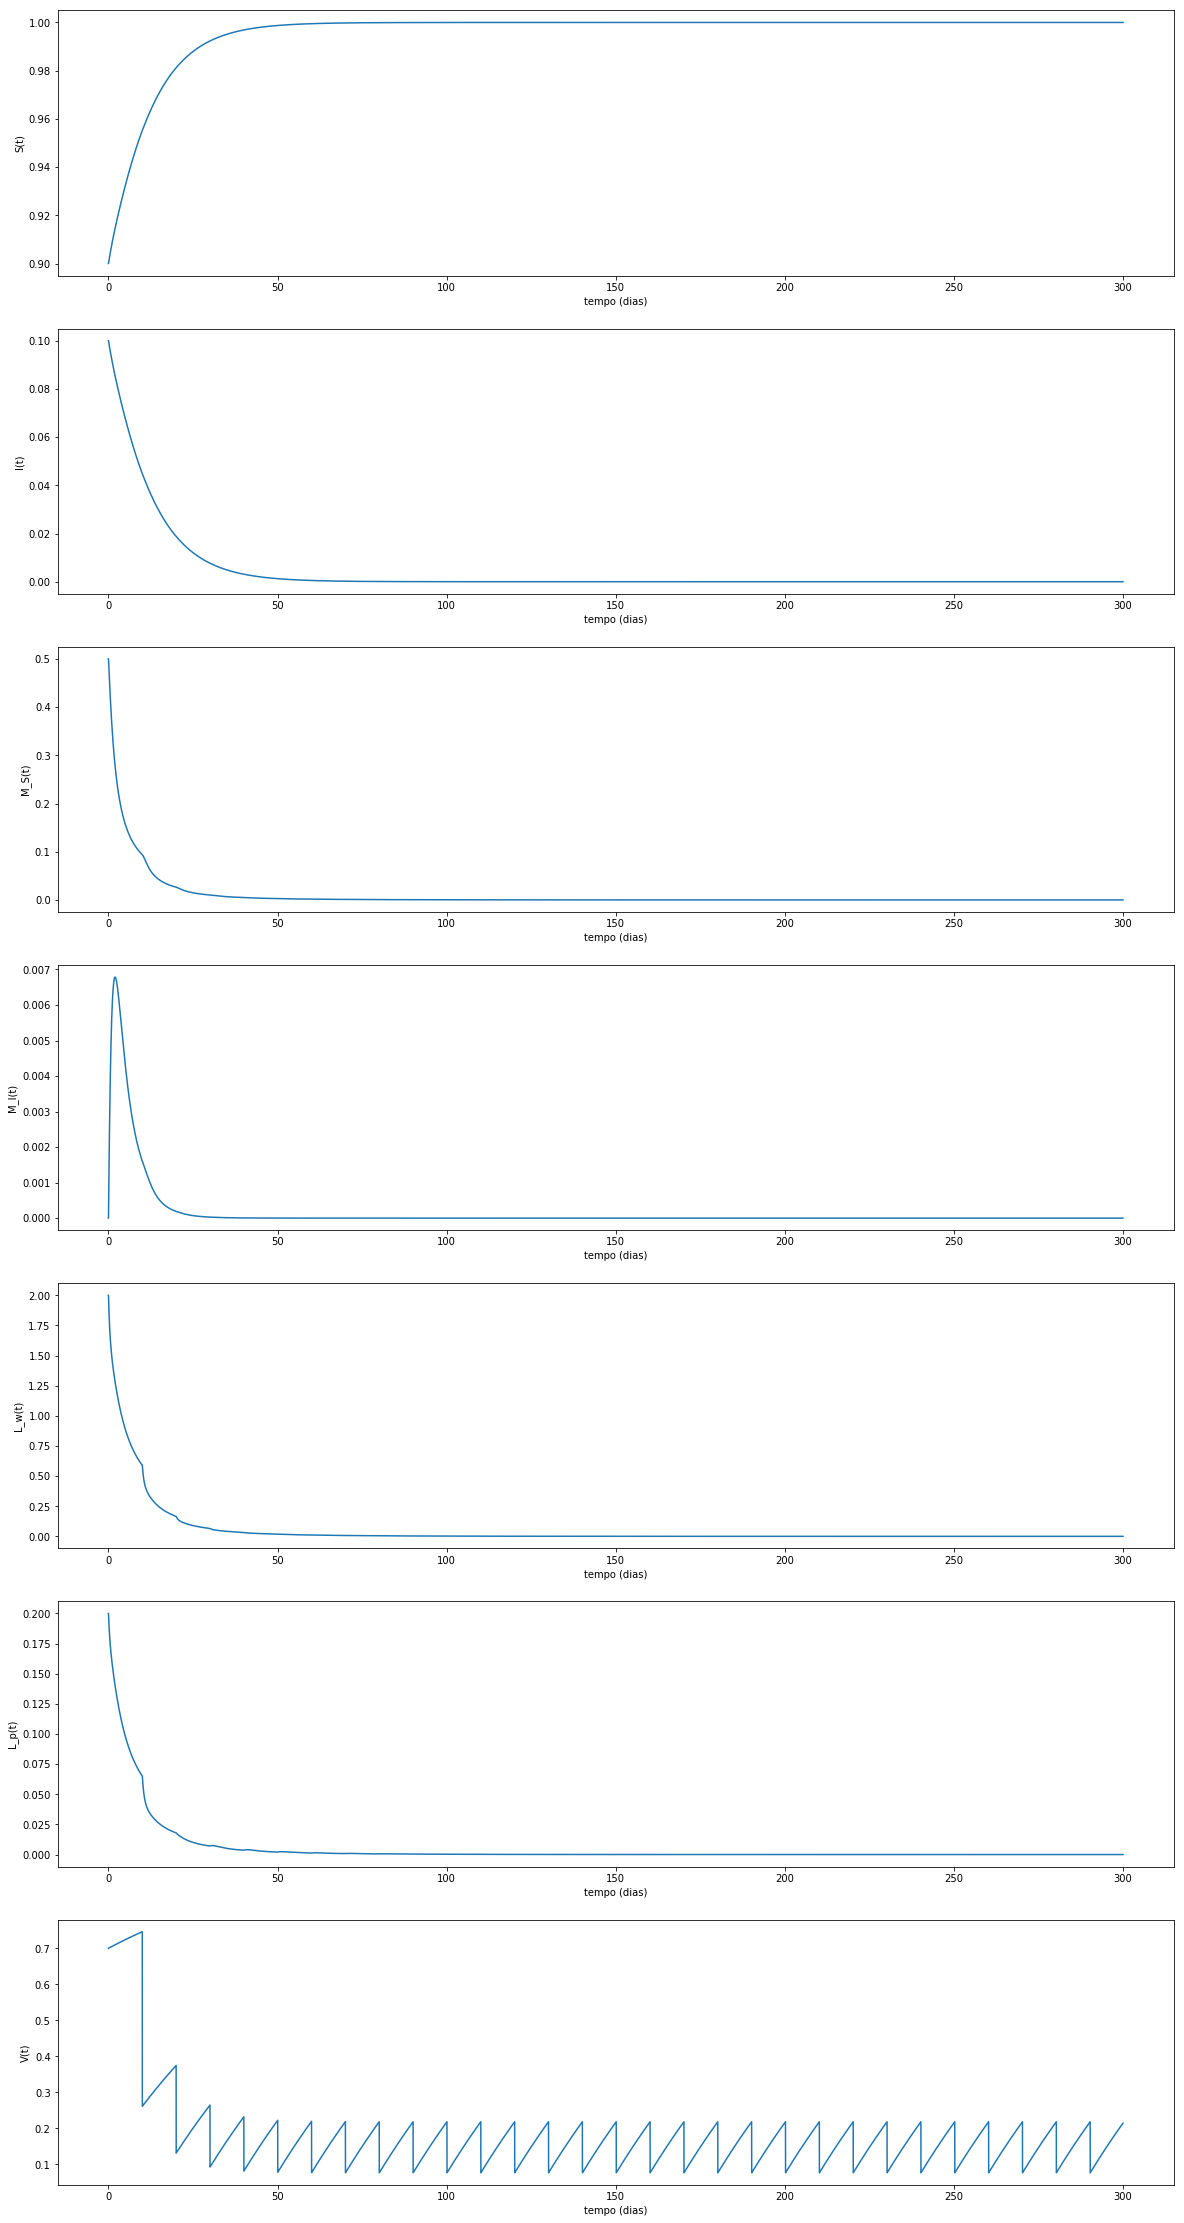

In [61]:
fig, axs = plt.subplots(7,1, figsize=(20, 40))

axs[0].plot(t, y[:,0])
axs[0].set_xlabel('tempo (dias)')
axs[0].set_ylabel('S(t)')


axs[1].plot(t, y[:,1])
axs[1].set_xlabel('tempo (dias)')
axs[1].set_ylabel('I(t)')



axs[2].plot(t, y[:,2])
axs[2].set_xlabel('tempo (dias)')
axs[2].set_ylabel('M_S(t)')


axs[3].plot(t, y[:,3])
axs[3].set_xlabel('tempo (dias)')
axs[3].set_ylabel('M_I(t)')


axs[4].plot(t, y[:,4])
axs[4].set_xlabel('tempo (dias)')
axs[4].set_ylabel('L_w(t)')

axs[5].plot(t, y[:,5])
axs[5].set_xlabel('tempo (dias)')
axs[5].set_ylabel('L_p(t)')

axs[6].plot(t, y[:,6])
axs[6].set_xlabel('tempo (dias)')
axs[6].set_ylabel('V(t)')



plt.show()

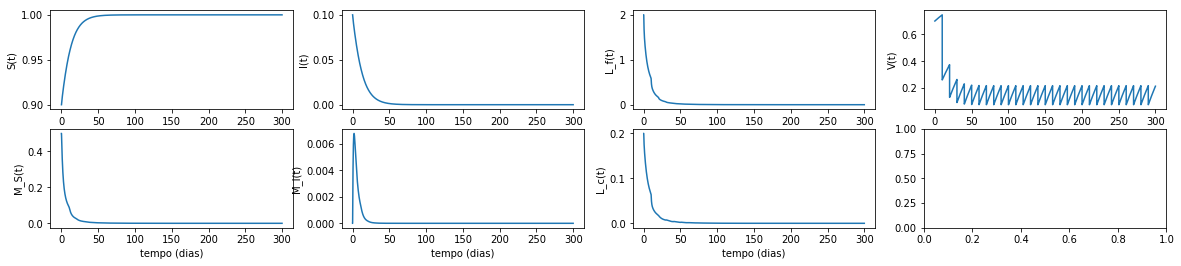

In [62]:

fig, axs = plt.subplots(2,4, figsize=(20, 4))

axs[0, 0].plot(t, y[:,0])
axs[0, 0].set_xlabel('tempo (dias)')
axs[0, 0].set_ylabel('S(t)')

axs[0, 1].plot(t, y[:,1])
axs[0, 1].set_xlabel('tempo (dias)')
axs[0, 1].set_ylabel('I(t)')



axs[1, 0].plot(t, y[:,2])
axs[1, 0].set_xlabel('tempo (dias)')
axs[1, 0].set_ylabel('M_S(t)')


axs[1, 1].plot(t, y[:,3])
axs[1, 1].set_xlabel('tempo (dias)')
axs[1, 1].set_ylabel('M_I(t)')


axs[0, 2].plot(t, y[:,4])
axs[0, 2].set_xlabel('tempo (dias)')
axs[0, 2].set_ylabel('L_f(t)')

axs[1, 2].plot(t, y[:,5])
axs[1, 2].set_xlabel('tempo (dias)')
axs[1, 2].set_ylabel('L_c(t)')

axs[0, 3].plot(t, y[:,6])
axs[0, 3].set_xlabel('tempo (dias)')
axs[0, 3].set_ylabel('V(t)')


plt.show()

Text(0, 0.5, 'proporção de Mosquitos(t)')

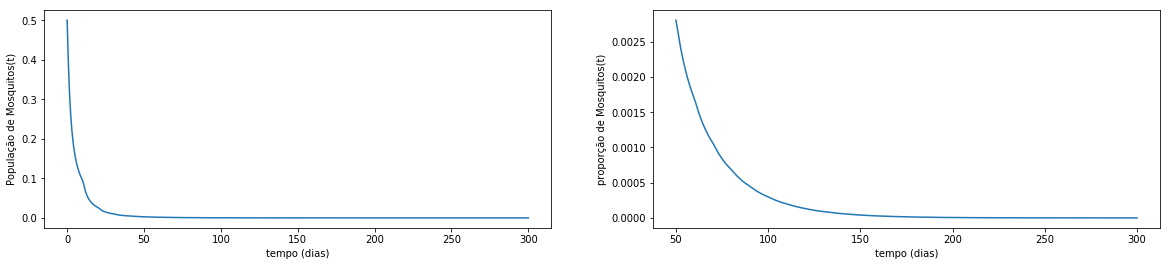

In [63]:
fig, axs = plt.subplots(1,2, figsize=(20, 4))

axs[0].plot(t, y[:,2] + y[:,3])
axs[0].set_xlabel('tempo (dias)')
axs[0].set_ylabel('População de Mosquitos(t)')

axs[1].plot( t[5000:], y[5000:,2]+y[5000:,3])
axs[1].set_xlabel('tempo (dias)')
axs[1].set_ylabel('proporção de Mosquitos(t)')

O teste do teorema implica em convergência para zero da população de mosquitos. Podemos observar nas simulações tal comportamento.

## Cenário 2

População de mosquito persiste, mas doença tende a zero

In [132]:
#Valor dos Parametros
beta_vh = 0.1 # 0 - 1 per mosquito #
kappa = 1/11 # 1/11 dimensionless
beta_hv = beta_vh # Per Mosquito
mu_M = 0.16 # 0.16 - 0.23 per day
nu = 1/15.6 # 1/15.6 +- 2.86 per day
alpha = 83 # 83 +- 48 larvae/per female mosquito
mu_L = 0.62 #0.62 - 0.99 per day - Larvae mortality on ponds without fish
mu_p = 0.31

#Parametros da Vegetação

r = 0.5/30 # 0.5 Por Mês 
gamma = 0.65 # Proporção de vegetação retirada na limpeza
tau = 30 # 30-60 dias
H = 0.05# Pop. realizando Limpeza - <5%

#Valor das Carrying Capacities Maximas
K_w_max = 0.4
K_p_max = 4


# Integração
#x0 = np.array([0.9,0.1,0.5,0,2,0.2]) #Initial conditions

#t = linspace(0, 300, 30000)                 # Time vector
#y = odeint(right_hand_side, x0, t)         # Actual integration

In [133]:
x0 = np.array([0.9,0.1,0.5,0,2,0.2,0.7])

t = linspace(0, 300, int(300/step))
y = jump_odeint(right_hand_side_v,jump_right_hand_side,x0, t)


In [134]:
1/15.6

0.06410256410256411

In [135]:
Mosquito_threshold()

min =  0.9908620097844657 

max =  1.0091379902155344 

1/basic offspring number =  0.020572530120481925 

Limit to periodic solution


In [136]:
# Threshold Value



In [137]:
Disease_threshold()

min =  0.4923271227570334 

max =  0.7459592683574694 

Solution converges to zero


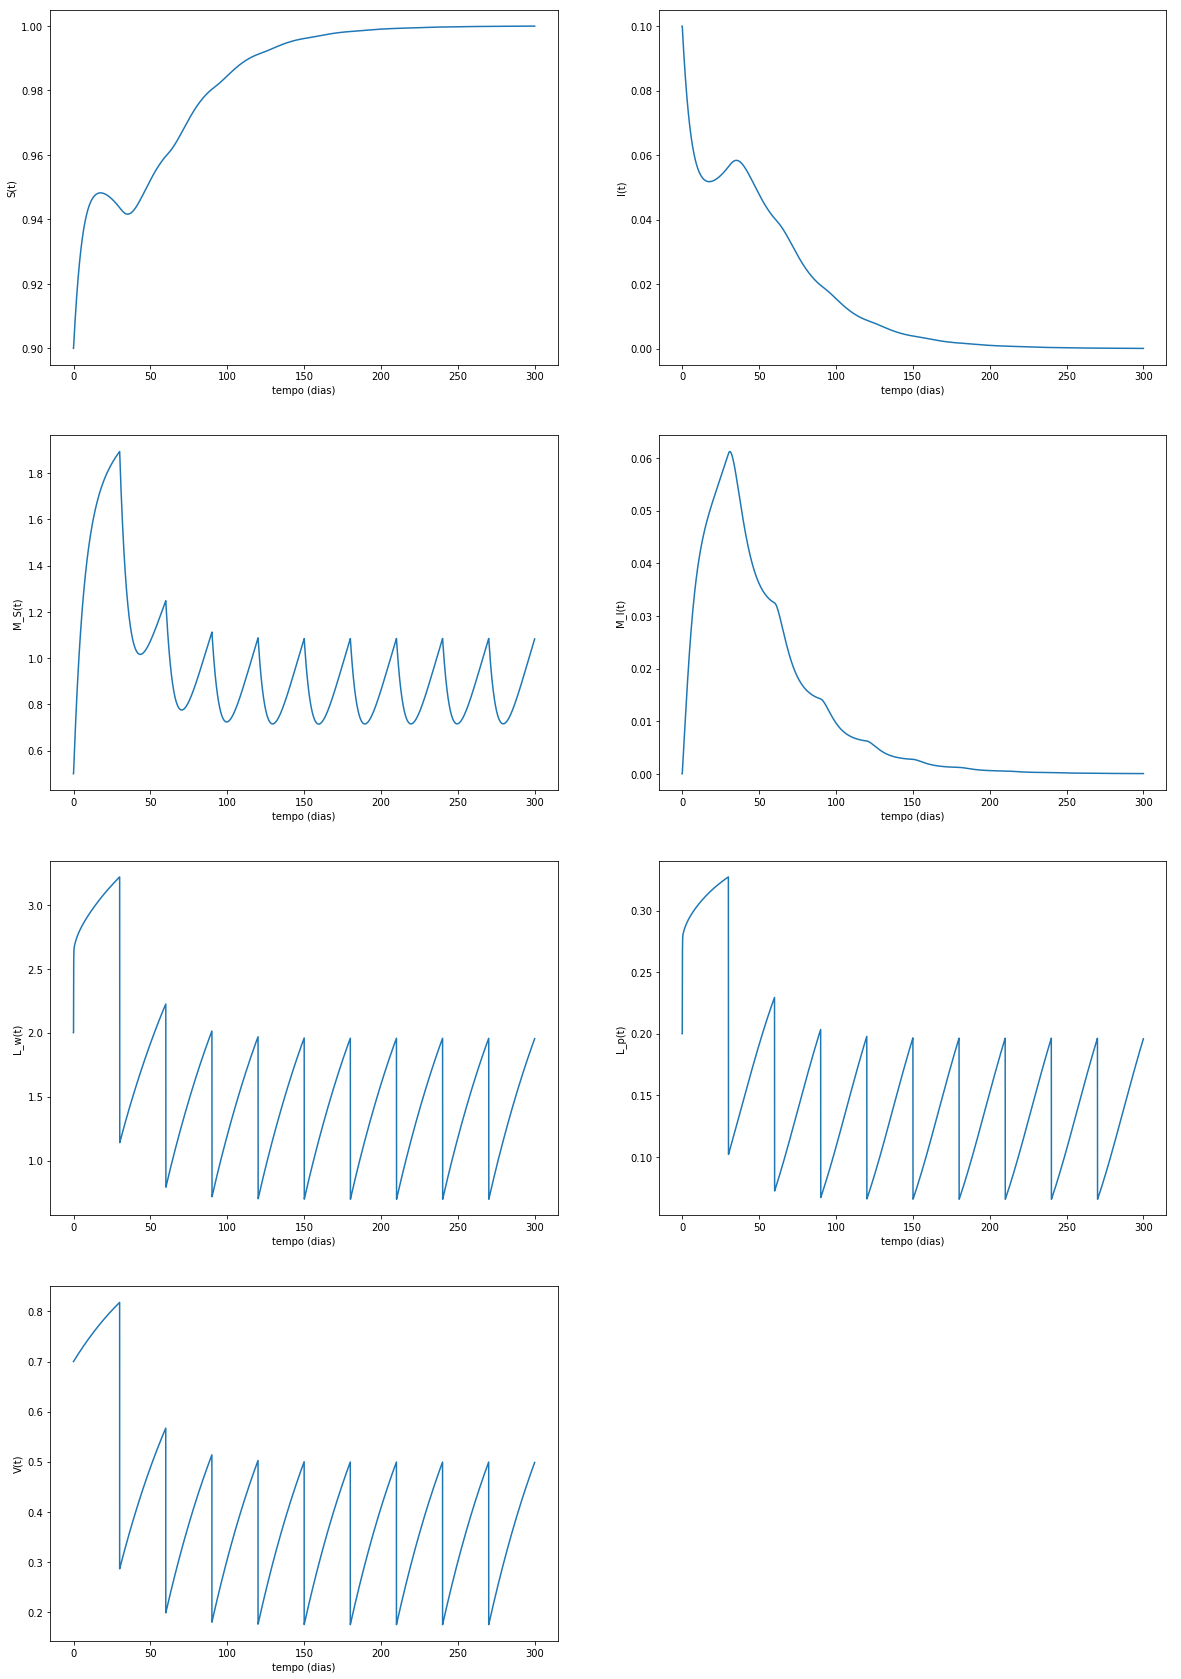

In [138]:

fig, axs = plt.subplots(4,2, figsize=(20, 30))

axs[0, 0].plot(t, y[:,0])
axs[0, 0].set_xlabel('tempo (dias)')
axs[0, 0].set_ylabel('S(t)')

axs[0, 1].plot(t, y[:,1])
axs[0, 1].set_xlabel('tempo (dias)')
axs[0, 1].set_ylabel('I(t)')



axs[1, 0].plot(t, y[:,2])
axs[1, 0].set_xlabel('tempo (dias)')
axs[1, 0].set_ylabel('M_S(t)')


axs[1, 1].plot(t, y[:,3])
axs[1, 1].set_xlabel('tempo (dias)')
axs[1, 1].set_ylabel('M_I(t)')


axs[2, 0].plot(t, y[:,4])
axs[2, 0].set_xlabel('tempo (dias)')
axs[2, 0].set_ylabel('L_w(t)')

axs[2, 1].plot(t, y[:,5])
axs[2, 1].set_xlabel('tempo (dias)')
axs[2, 1].set_ylabel('L_p(t)')

axs[3, 0].plot(t, y[:,6])
axs[3, 0].set_xlabel('tempo (dias)')
axs[3, 0].set_ylabel('V(t)')

axs[3,1].axis("off")


plt.show()

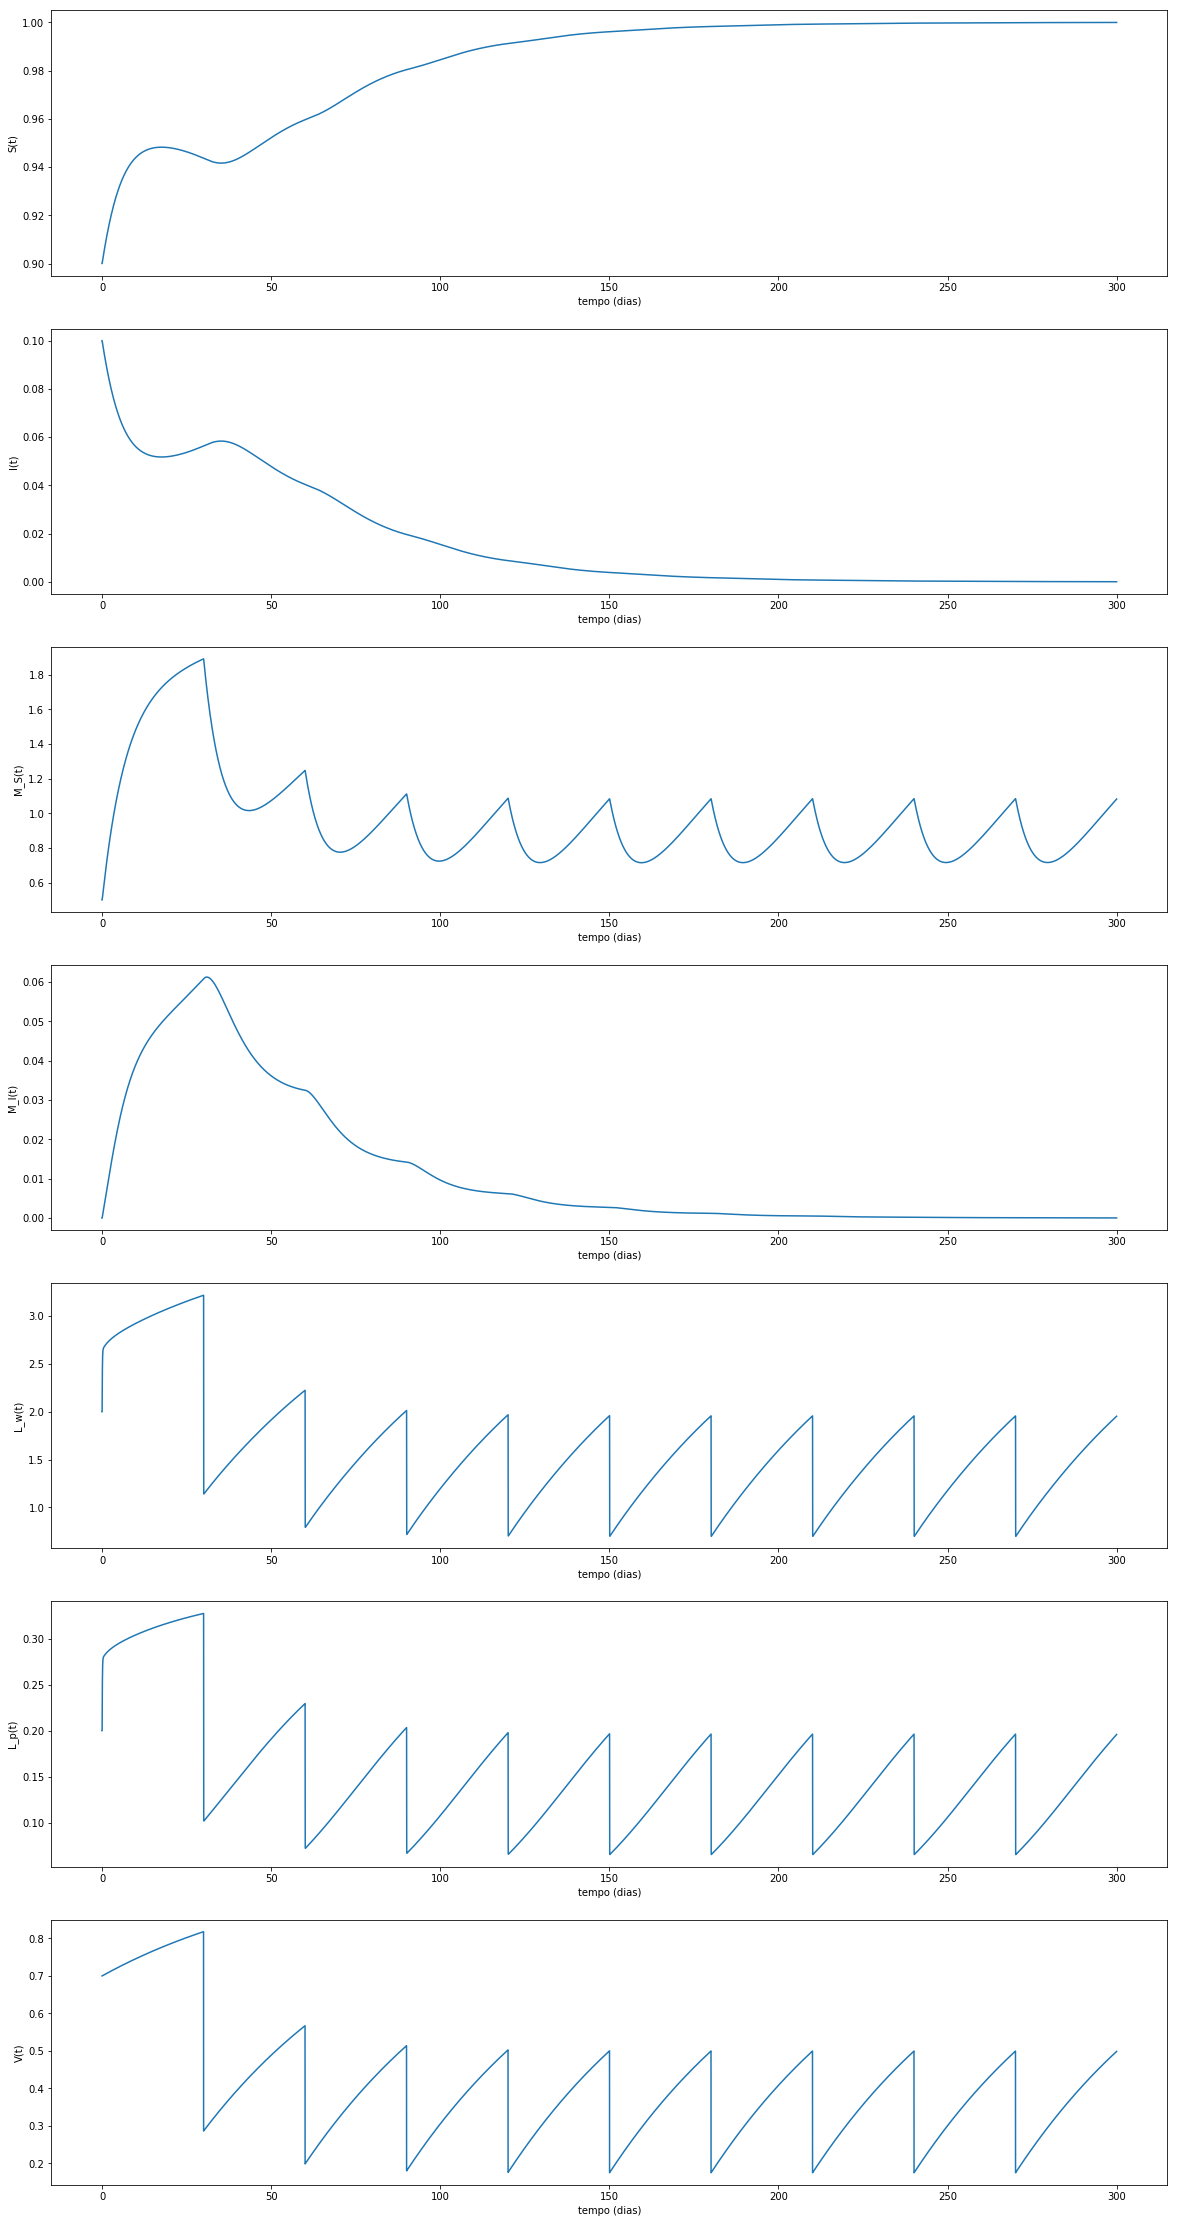

In [53]:
fig, axs = plt.subplots(7,1, figsize=(20, 40))

axs[0].plot(t, y[:,0])
axs[0].set_xlabel('tempo (dias)')
axs[0].set_ylabel('S(t)')


axs[1].plot(t, y[:,1])
axs[1].set_xlabel('tempo (dias)')
axs[1].set_ylabel('I(t)')



axs[2].plot(t, y[:,2])
axs[2].set_xlabel('tempo (dias)')
axs[2].set_ylabel('M_S(t)')


axs[3].plot(t, y[:,3])
axs[3].set_xlabel('tempo (dias)')
axs[3].set_ylabel('M_I(t)')


axs[4].plot(t, y[:,4])
axs[4].set_xlabel('tempo (dias)')
axs[4].set_ylabel('L_w(t)')

axs[5].plot(t, y[:,5])
axs[5].set_xlabel('tempo (dias)')
axs[5].set_ylabel('L_p(t)')

axs[6].plot(t, y[:,6])
axs[6].set_xlabel('tempo (dias)')
axs[6].set_ylabel('V(t)')



plt.show()

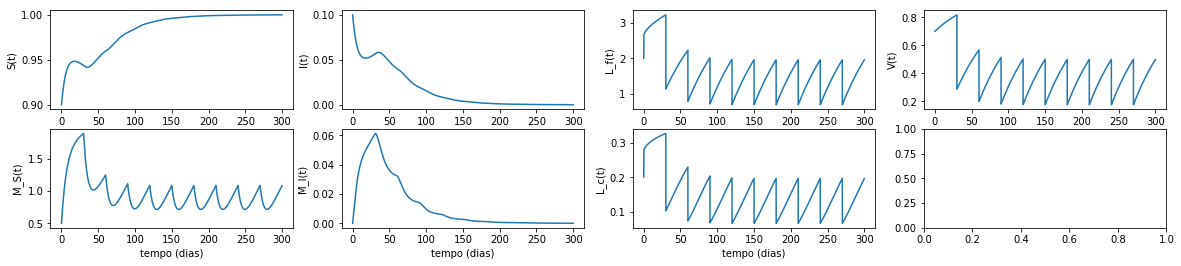

In [72]:

fig, axs = plt.subplots(2,4, figsize=(20, 4))

axs[0, 0].plot(t, y[:,0])
axs[0, 0].set_xlabel('tempo (dias)')
axs[0, 0].set_ylabel('S(t)')

axs[0, 1].plot(t, y[:,1])
axs[0, 1].set_xlabel('tempo (dias)')
axs[0, 1].set_ylabel('I(t)')



axs[1, 0].plot(t, y[:,2])
axs[1, 0].set_xlabel('tempo (dias)')
axs[1, 0].set_ylabel('M_S(t)')


axs[1, 1].plot(t, y[:,3])
axs[1, 1].set_xlabel('tempo (dias)')
axs[1, 1].set_ylabel('M_I(t)')


axs[0, 2].plot(t, y[:,4])
axs[0, 2].set_xlabel('tempo (dias)')
axs[0, 2].set_ylabel('L_f(t)')

axs[1, 2].plot(t, y[:,5])
axs[1, 2].set_xlabel('tempo (dias)')
axs[1, 2].set_ylabel('L_c(t)')

axs[0, 3].plot(t, y[:,6])
axs[0, 3].set_xlabel('tempo (dias)')
axs[0, 3].set_ylabel('V(t)')


plt.show()

Text(0, 0.5, 'proporção de infectados(t)')

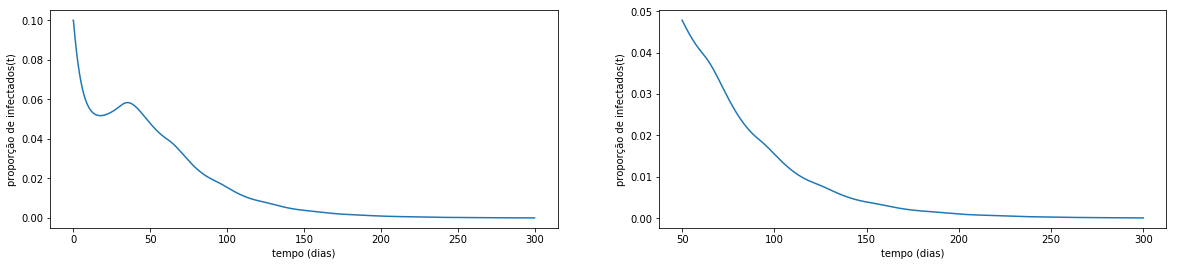

In [73]:
fig, axs = plt.subplots(1,2, figsize=(20, 4))

axs[0].plot(t, y[:,1])
axs[0].set_xlabel('tempo (dias)')
axs[0].set_ylabel('proporção de infectados(t)')

axs[1].plot( t[5000:], y[5000:,1])
axs[1].set_xlabel('tempo (dias)')
axs[1].set_ylabel('proporção de infectados(t)')

O teste do teorema implica em população de mosquito periódica, mas doença tendendo a zero. Podemos observar esse comportamento nas simulações.

## Cenário 3

In [94]:
#Valor dos Parametros
beta_vh = 0.2 # 0 - 1 per mosquito #
kappa = 1/11 # 1/11 dimensionless
beta_hv = beta_vh # Per Mosquito
mu_M = 0.16 # 0.16 - 0.23 per day
nu = 1/15.6 # 1/15.6 +- 2.86 per day
alpha = 83 # 83 +- 48 larvae/per female mosquito
mu_L = 0.62 #0.62 - 0.99 per day - Larvae mortality on ponds without fish
mu_p = 0.31

#Parametros da Vegetação

r = 0.5/30 # 0.5 Por Mês 
gamma = 0.65 # Proporção de vegetação retirada na limpeza
tau = 5# 30-60 dias
H = 0.10# Pop. realizando Limpeza - <5%

#Valor das Carrying Capacities Maximas
K_w_max = 0.4
K_p_max = 4

In [75]:
#x0 = np.array([0.9,0.1,0.5,0,9.588,9.588]) #Initial conditions

#t = linspace(0, 300, 30000)                 # Time vector
#y = odeint(right_hand_side, x0, t)         # Actual integration

In [95]:
x0 = np.array([0.9,0.1,0.5,0,2,0.2,0.7])

t = linspace(0, 300, int(300/step))
y = jump_odeint(right_hand_side_v,jump_right_hand_side,x0, t)


In [77]:
Mosquito_threshold()

Limit to periodic solution


In [96]:
Disease_threshold()

min =  0.5395942319388073 

max =  0.5868090917158388 

Solution converges to zero


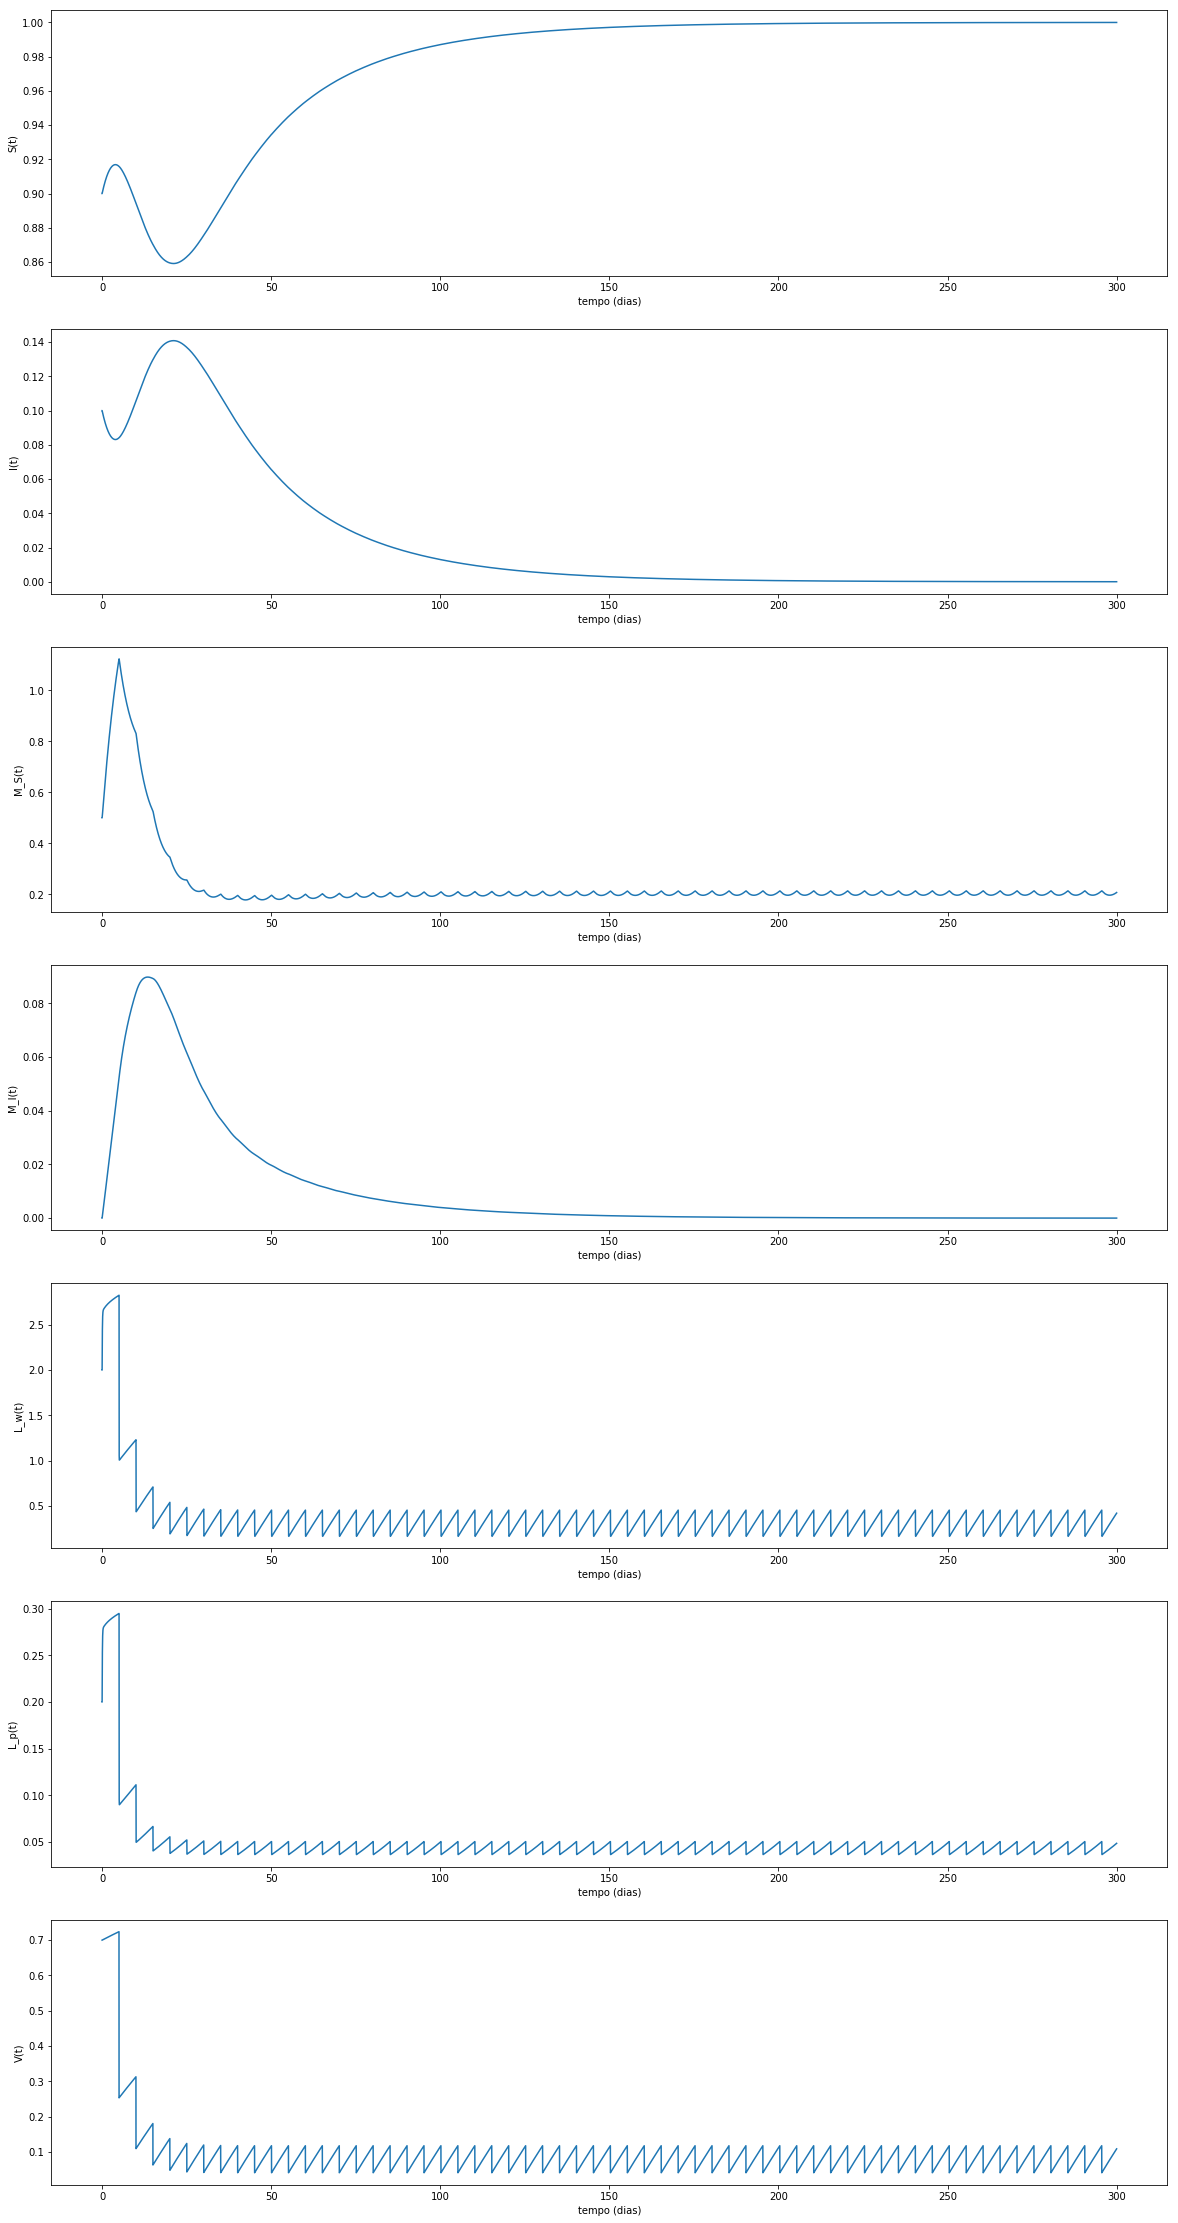

In [80]:
fig, axs = plt.subplots(7,1, figsize=(20, 40))

axs[0].plot(t, y[:,0])
axs[0].set_xlabel('tempo (dias)')
axs[0].set_ylabel('S(t)')


axs[1].plot(t, y[:,1])
axs[1].set_xlabel('tempo (dias)')
axs[1].set_ylabel('I(t)')



axs[2].plot(t, y[:,2])
axs[2].set_xlabel('tempo (dias)')
axs[2].set_ylabel('M_S(t)')


axs[3].plot(t, y[:,3])
axs[3].set_xlabel('tempo (dias)')
axs[3].set_ylabel('M_I(t)')


axs[4].plot(t, y[:,4])
axs[4].set_xlabel('tempo (dias)')
axs[4].set_ylabel('L_w(t)')

axs[5].plot(t, y[:,5])
axs[5].set_xlabel('tempo (dias)')
axs[5].set_ylabel('L_p(t)')

axs[6].plot(t, y[:,6])
axs[6].set_xlabel('tempo (dias)')
axs[6].set_ylabel('V(t)')



plt.show()

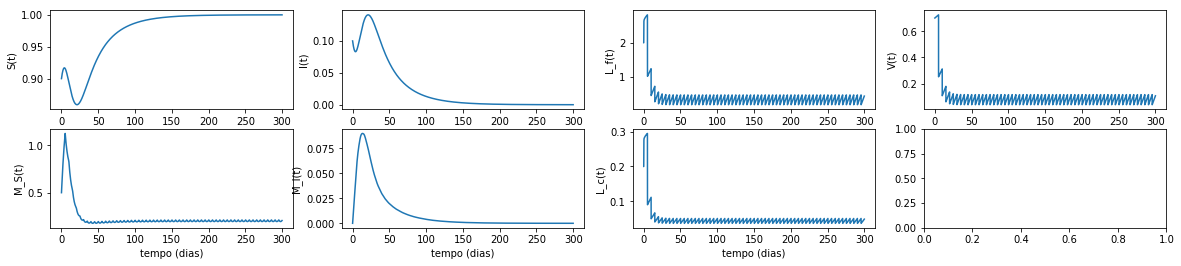

In [79]:

fig, axs = plt.subplots(2,4, figsize=(20, 4))

axs[0, 0].plot(t, y[:,0])
axs[0, 0].set_xlabel('tempo (dias)')
axs[0, 0].set_ylabel('S(t)')

axs[0, 1].plot(t, y[:,1])
axs[0, 1].set_xlabel('tempo (dias)')
axs[0, 1].set_ylabel('I(t)')



axs[1, 0].plot(t, y[:,2])
axs[1, 0].set_xlabel('tempo (dias)')
axs[1, 0].set_ylabel('M_S(t)')


axs[1, 1].plot(t, y[:,3])
axs[1, 1].set_xlabel('tempo (dias)')
axs[1, 1].set_ylabel('M_I(t)')


axs[0, 2].plot(t, y[:,4])
axs[0, 2].set_xlabel('tempo (dias)')
axs[0, 2].set_ylabel('L_f(t)')

axs[1, 2].plot(t, y[:,5])
axs[1, 2].set_xlabel('tempo (dias)')
axs[1, 2].set_ylabel('L_c(t)')

axs[0, 3].plot(t, y[:,6])
axs[0, 3].set_xlabel('tempo (dias)')
axs[0, 3].set_ylabel('V(t)')


plt.show()

Text(0, 0.5, 'proporção de infectados(t)')

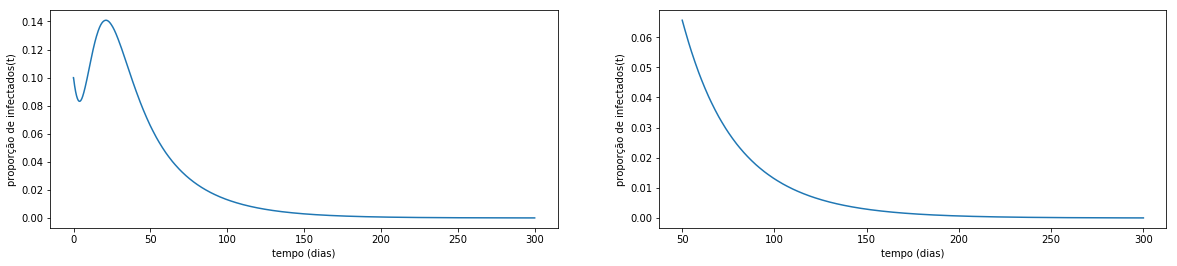

In [96]:
fig, axs = plt.subplots(1,2, figsize=(20, 4))

axs[0].plot(t, y[:,1])
axs[0].set_xlabel('tempo (dias)')
axs[0].set_ylabel('proporção de infectados(t)')

axs[1].plot( t[5000:], y[5000:,1])
axs[1].set_xlabel('tempo (dias)')
axs[1].set_ylabel('proporção de infectados(t)')

Cenário 4

In [97]:
#Valor dos Parametros
beta_vh = 0.2 # 0 - 1 per mosquito #
kappa = 1/11 # 1/11 dimensionless
beta_hv = beta_vh # Per Mosquito
mu_M = 0.16 # 0.16 - 0.23 per day
nu = 1/15.6 # 1/15.6 +- 2.86 per day
alpha = 83 # 83 +- 48 larvae/per female mosquito
mu_L = 0.62 #0.62 - 0.99 per day - Larvae mortality on ponds without fish
mu_p = 0.31

#Parametros da Vegetação

r = 0.5/30 # 0.5 Por Mês 
gamma = 0.65 # Proporção de vegetação retirada na limpeza
tau = 5# 30-60 dias
H = 0.10# Pop. realizando Limpeza - <5%

#Valor das Carrying Capacities Maximas
K_w_max = 0.4
K_p_max = 4

In [98]:
x0 = np.array([0.9,0.1,0.5,0,2,0.2,0.7])

t = linspace(0, 300, int(300/step))
y = jump_odeint(right_hand_side_v,jump_right_hand_side,x0, t)


In [99]:
#x0 = np.array([0.9,0.1,0.5,0,9.588,9.588]) #Initial conditions

#t = linspace(0, 300, 30000)                 # Time vector
#y = odeint(right_hand_side, x0, t)         # Actual integration

In [100]:
Mosquito_threshold()

Limit to periodic solution


In [101]:
Disease_threshold()

min =  0.5395941909761235 

max =  3.2348142696632927 



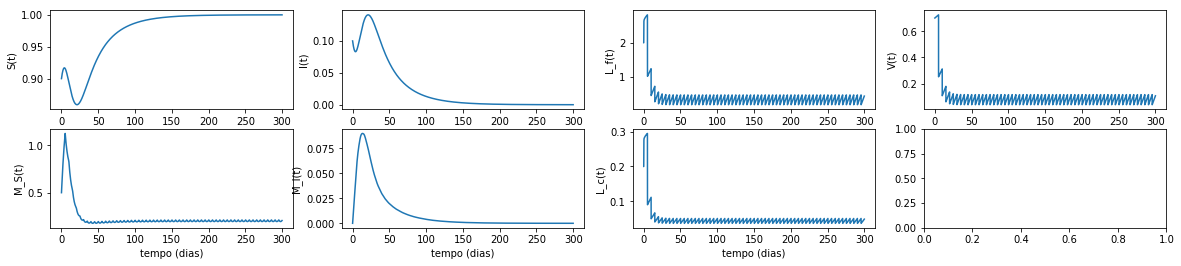

In [103]:

fig, axs = plt.subplots(2,4, figsize=(20, 4))

axs[0, 0].plot(t, y[:,0])
axs[0, 0].set_xlabel('tempo (dias)')
axs[0, 0].set_ylabel('S(t)')

axs[0, 1].plot(t, y[:,1])
axs[0, 1].set_xlabel('tempo (dias)')
axs[0, 1].set_ylabel('I(t)')



axs[1, 0].plot(t, y[:,2])
axs[1, 0].set_xlabel('tempo (dias)')
axs[1, 0].set_ylabel('M_S(t)')


axs[1, 1].plot(t, y[:,3])
axs[1, 1].set_xlabel('tempo (dias)')
axs[1, 1].set_ylabel('M_I(t)')


axs[0, 2].plot(t, y[:,4])
axs[0, 2].set_xlabel('tempo (dias)')
axs[0, 2].set_ylabel('L_f(t)')

axs[1, 2].plot(t, y[:,5])
axs[1, 2].set_xlabel('tempo (dias)')
axs[1, 2].set_ylabel('L_c(t)')

axs[0, 3].plot(t, y[:,6])
axs[0, 3].set_xlabel('tempo (dias)')
axs[0, 3].set_ylabel('V(t)')


plt.show()

Text(0, 0.5, 'proporção de infectados(t)')

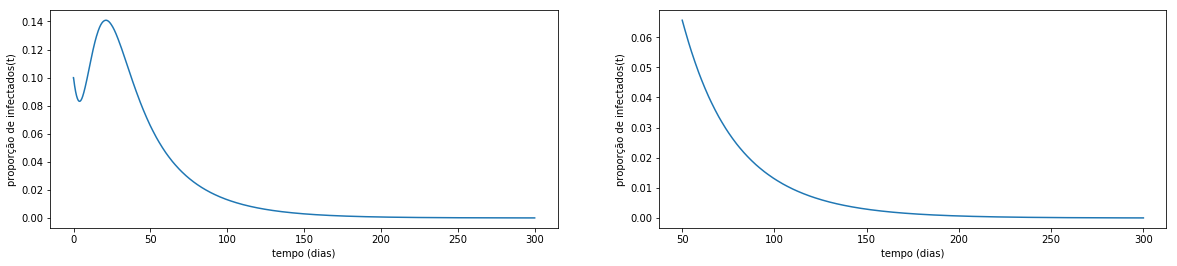

In [104]:
fig, axs = plt.subplots(1,2, figsize=(20, 4))

axs[0].plot(t, y[:,1])
axs[0].set_xlabel('tempo (dias)')
axs[0].set_ylabel('proporção de infectados(t)')

axs[1].plot( t[5000:], y[5000:,1])
axs[1].set_xlabel('tempo (dias)')
axs[1].set_ylabel('proporção de infectados(t)')

In [105]:
Y = np.zeros((6,30000))

In [106]:
Y[0] = y[:,1]

## Simulação para diferentes períodos de limpeza

In [107]:
#Valor dos Parametros
beta_vh = 0.2 # 0 - 1 per mosquito #
kappa = 1/11 # 1/11 dimensionless
beta_hv = beta_vh # Per Mosquito
mu_M = 0.16 # 0.16 - 0.23 per day
nu = 1/15.6 # 1/15.6 +- 2.86 per day
alpha = 83# 83 +- 48 larvae/per female mosquito
mu_L = 0.62 #0.62 - 0.99 per day - Larvae mortality on ponds without fish
mu_p = 0.31

#Parametros da Vegetação

r = 0.5/30 # 0.5 Por Mês 
gamma = 0.65 # Proporção de vegetação retirada na limpeza
tau = 30 # 30-60 dias
H = 0.05# Pop. realizando Limpeza - <5%

#Valor das Carrying Capacities Maximas
K_w_max = 0.4
K_p_max = 4

In [43]:
x0 = np.array([0.9,0.1,0.5,0,2,0.2,0.7])

t = linspace(0, 300, int(300/step))



In [109]:
taus = [60,30,20,15,10,5]

Y=np.zeros((6,30000))
for i,period in enumerate(taus):
    tau = period
    
    x0 = np.array([0.9,0.1,0.5,0,9.588,9.588,0.7]) #Initial conditions
    t = linspace(0, 300, 30000)                 # Time vector
    y = jump_odeint(right_hand_side_v,jump_right_hand_side,x0, t)
    Y[i] = y[:,1]

    

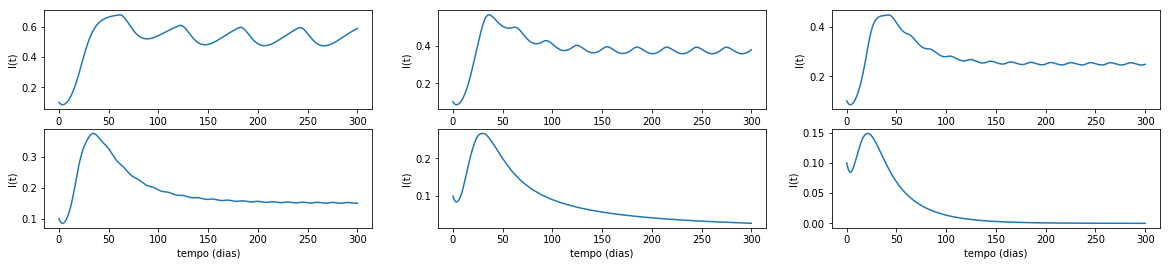

In [110]:
fig, axs = plt.subplots(2,3, figsize=(20, 4))

axs[0,0].plot(t, Y[0])
axs[0,0].set_xlabel('tempo (dias)')
axs[0,0].set_ylabel('I(t)')

axs[0,1].plot( t, Y[1])
axs[0,1].set_xlabel('tempo (dias)')
axs[0,1].set_ylabel('I(t)')

axs[0,2].plot( t, Y[2])
axs[0,2].set_xlabel('tempo (dias)')
axs[0,2].set_ylabel('I(t)')

axs[1,0].plot( t, Y[3])
axs[1,0].set_xlabel('tempo (dias)')
axs[1,0].set_ylabel('I(t)')

axs[1,1].plot( t, Y[4])
axs[1,1].set_xlabel('tempo (dias)')
axs[1,1].set_ylabel('I(t)')

axs[1,2].plot( t, Y[5])
axs[1,2].set_xlabel('tempo (dias)')
axs[1,2].set_ylabel('I(t)')

plt.show()

# Plotting Different Trajectories on the same graph

In [113]:
#Valor dos Parametros
beta_vh = 0.2 # 0 - 1 per mosquito #
kappa = 1/11 # 1/11 dimensionless
beta_hv = beta_vh # Per Mosquito
mu_M = 0.16 # 0.16 - 0.23 per day
nu = 1/15.6 # 1/15.6 +- 2.86 per day
alpha = 83# 83 +- 48 larvae/per female mosquito
mu_L = 0.62 #0.62 - 0.99 per day - Larvae mortality on ponds without fish
mu_p = 0.31

#Parametros da Vegetação

r = 0.5/30 # 0.5 Por Mês 
gamma = 0.65 # Proporção de vegetação retirada na limpeza
tau = 30 # 30-60 dias
H = 0.05# Pop. realizando Limpeza - <5%

#Valor das Carrying Capacities Maximas
K_w_max = 0.4
K_p_max = 4


#Condições iniciais
x0 = np.array([0.9,0.1,0.5,0,2,0.2,0.7])

In [114]:
#integrating
taus = [60,30,20,15,10,5]
#taus = linspace(0,1,10)
Y = []
t = linspace(0, 300, 30000)

for period in taus:
    tau = period
    #beta_vh = period
    #y = odeint(right_hand_side, x0, t)
    y = jump_odeint(right_hand_side_v,jump_right_hand_side,x0, t)
    Y.append(y)

In [115]:
Y[0].shape

(30000, 7)

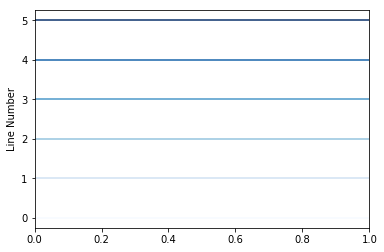

In [116]:

from matplotlib import cm


start = 0.0
stop = 1.0
number_of_lines= 6
cm_subsection = linspace(start, stop, number_of_lines) 

colors = [ cm.get_cmap('Blues')(x) for x in cm_subsection ]

for i, color in enumerate(colors):
    plt.axhline(i, color=color)

plt.ylabel('Line Number')
plt.show()

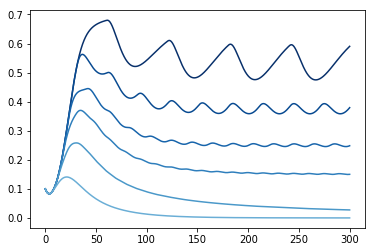

In [117]:
# Plotting

start = 1.0
stop = 0.5
number_of_lines= 6
cm_subsection = linspace(start, stop, number_of_lines) 

colors = [ cm.get_cmap('Blues')(x) for x in cm_subsection ]

for i,y in enumerate(Y):
    plt.plot(t,y[:,1],color = colors[i])
plt.show()